**FINAL PROJECT: PREDICTIVE MAINTANANCE**

**The Connectors:**
1. Rai Fadhlurrahman
2. Muhammad Bilal Athallah
3. Paula Niken Gita Adinda Putri
4. Rachmat Winardiansyah
5. Nur Aldillah Chumairoh

# Business Understanding

Perusahaan X merupakan perusahaan yang memproduksi sparepart kendaraan bermotor sejak tahun 2000 dengan konsumen yang terdiri dari beberapa pabrikan otomotif di Indonesia. Sparepart yang diproduksi meliputi bearing, crank shaft, piston, dan lain-lain.

Dengan kualitas produk yang berkualitas dan berstandar internasional, Perusahaan X hendak melakukan ekspansi bisnis ke pasar internasional. Namun, terdapat masalah kerusakan mesin (machine failure) saat proses produksi yang mengakibatkan munculnya biaya operasional tambahan. Adanya biaya tambahan tersebut menyebabkan Perusahaan X belum layak untuk melakukan ekspansi bisnis ke luar negeri.

Setelah diidentifikasi lebih lanjut, penyebab kerusakan mesin terdiri dari 5 jenis, yaitu tool wear failures, heat dissipation failures, power failures, overstrain failures, dan random failures.

Sebagai upaya untuk meminimalisir terjadinya kerusakan mesin, direktur produksi meminta kami untuk membuat model yang dapat memprediksi terjadinya kerusakan mesin tersebut berdasarkan fitur-fitur yang telah dikumpulkan. Output yang diharapkan dari pemodelan yang kami buat adalah model mampu memeprediksi apakah suatu mesin mengalami kerusakan atau tidak (binary classification). Selain itu, kami diminta untuk memberi rekomendasi tindakan maintanance mesin setelah diperoleh model yang terbaik agar biaya operasional produksi dapat dikurangi dengan optimal.





# Data Understanding

Berikut merupakan deskripsi dari masing-masing fitur yang akan digunakan dalam pemodelan predictive maintanance.

1.   UDI:

      nomor urut produk.

2.   Product ID:

      kode unik produk yang terdiri dari huruf L, M, H. L atau Low (50% dari seluruh produk), M atau Medium (30%), dan H atau High (20%) yang menyatakan varian kualitas produk.

3.   Type:

      tipe kualitas produk yaitu L, M, dan H.

4.   Air temperature [K]:
      
      nilai temperatur udara mesin yang dibangkitkan melalui proses random walk yang dinormalisasi dengan standar deviasi 2K hingga 300K.

5.   Process temperature [K]:

      nilai temperatur proses mesin yang dibangkitkan melalui proses random walk yang dinormalisasi dengan standar deviasi 1K, kemudian ditambahkan ke fitur air temperature ditambah 10K.

6.   Rational speed [rpm]:

      nilai kecepatan rasional mesin yang dihitung dari daya 2860 W, dilapis dengan nilai kebisingan berdistribusi normal.

7.   Torque [Nm]:

      nilai torsi mesin yang dibangkitkan melalui distribusi normal dengan rata-rata 40 Nm dan standar deviasi 10 Nm, serta tidak terdapat nilai negatif.

8.   Tool wear [min]:

      varian kualitas H/M/L yang ditambahkan 5/3/2 menit
pada alat aus yang digunakan dalam proses.

9.   Machine failures:

      merupakan label yang menunjukkan mesin mengalami kegagalan berdasarkan satu atau beberapa jenis kerusakan. (1 = mesin rusak, 0 = mesin tidak rusak). Berikut merupakan deskripsi dari masing-masing jenis kerusakan mesin:

*   TWF:

      tool wear failure atau kegagalan mesin jenis TWF adalah kerusakan pahat yang akan diganti pada waktu keausan pahat yang dipilih secara acak antara 200 - 240 menit.

*   HDF:

      heat dissipation failure atau kegagalan mesin jenis HDF terjadi apabila perbedaan temperatur udara dan temperatur proses dibawah 8.6K serta kecepatan rasional dari alat dibawah 1380 rpm.

*   PWF:

     power failure atau kegagalan mesin jenis PWF terjadi apabila daya yang digunakan untuk menyeimbangkan torsi dan kecepatan rasional mesin dibawah 3500W atau diatas 9000W.

*   OSF:

      overstrain failure atau kegagalan mesin jenis OSF terjadi apabila nilai tool wear dan torsi melebihi 11000 minNm untuk produk L, 12000 minNm untuk produk M, dan 13000 minNm untuk produk H.


*   RNF:

     random failure atau kegagalan mesin jenis RNF merupakan peluang 0,1% suatu proses mengalami kegagalan dari parameter prosesnya.

Jika setidaknya satu dari 5 jenis kegagalan di atas benar, maka proses produksi dianggap gagal (failure) dan label 'Machine failure' dikode dengan nilai 1, sebaliknya bernilai 0.









# Data Preprocessing

## Import Library

Berikut adalah library yang akan digunakan dalam pengolahan data.

In [ ]:
# Import Library
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from scipy import stats
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
!pip install category_encoders

!pip install dataprep
from dataprep.eda import create_report

# Library for model development
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import recall_score, f1_score, roc_auc_score
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import auc, roc_curve

# models
from sklearn.linear_model import LinearRegression, LogisticRegression, Perceptron, RidgeClassifier, SGDClassifier, LassoCV
from sklearn.svm import SVC, LinearSVC, SVR
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier

from sklearn.model_selection import cross_val_score
from sklearn.utils import resample
from sklearn.model_selection import GridSearchCV

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 3.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 46.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.6/133.6 kB 17.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 48.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 62.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 42.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 764.0/764.0 kB 31.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 73.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
    

## Import Dataset

Dataset di import melalui link Github dengan format .csv

In [ ]:
#Import data melalui Github
!git clone https://github.com/bilalathallah/finpro-DSSC.git
df = pd.read_csv('finpro-DSSC/ai4i2020.csv')
df

Cloning into 'finpro-DSSC'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), 134.75 KiB | 2.25 MiB/s, done.


UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0         1     M14860    M                298.1                    308.6   
1         2     L47181    L                298.2                    308.7   
2         3     L47182    L                298.1                    308.5   
3         4     L47183    L                298.2                    308.6   
4         5     L47184    L                298.2                    308.7   
...     ...        ...  ...                  ...                      ...   
9995   9996     M24855    M                298.8                    308.4   
9996   9997     H39410    H                298.9                    308.4   
9997   9998     M24857    M                299.0                    308.6   
9998   9999     H39412    H                299.0                    308.7   
9999  10000     M24859    M                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
0                       1551         42.8                0                0   
1                       1408         46.3                3                0   
2                       1498         49.4                5                0   
3                       1433         39.5                7                0   
4                       1408         40.0                9                0   
...                      ...          ...              ...              ...   
9995                    1604         29.5               14                0   
9996                    1632         31.8               17                0   
9997                    1645         33.4               22                0   
9998                    1408         48.5               25                0   
9999                    1500         40.2               30                0   

      TWF  HDF  PWF  OSF  RNF  
0       0    0    0    0    0  
1       0    0    0    0    0  
2       0    0    0    0    0  
3       0    0    0    0    0  
4       0    0    0    0    0  
...   ...  ...  ...  ...  ...  
9995    0    0    0    0    0  
9996    0    0    0    0    0  
9997    0    0    0    0    0  
9998    0    0    0    0    0  
9999    0    0    0    0    0  

[10000 rows x 14 columns]

**Insight:**

Dataset memiliki 10000 observasi dengan masing-masing observasi terdiri dari 14 fitur/kolom.

## Tipe Data

Selanjutnya, akan dilakukan pengecakan tipe data pada masing-masing fitur untuk mengetahui apakah setiap fitur memiliki tipe data sesuai dengan deskripsi data yang telah diuraikan sebelumnya.

In [ ]:
# Cek tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

**Insight:**

Beberapa fitur telah memiliki tipe data yang telah sesuai dengan deskripsi data. Namun, fitur ['Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'] masih bertipe integer yang seharusnya bertipe object. Sehingga, akan dilakukan konversi tipe data dari integer ke object pada 6 fitur tersebut.

## Statistika Deskriptif

Pada bagian ini, akan dilihat informasi statistik deskriptif pada masing-masing fitur untuk mengetahui ukuran-ukuran statistik secara umum dari masing-masing fitur.

In [ ]:
# Dataframe untuk Machine Failure = 0 (Tidak Rusak)
df_trusak = df[(df['Machine failure'] == 0)]
df_trusak
# StatDes untuk Machine Failure = 0 (Tidak Rusak)
df_trusak.describe()

UDI  Air temperature [K]  Process temperature [K]  \
count   9661.000000          9661.000000              9661.000000   
mean    5012.878791           299.973999               309.995570   
std     2902.384020             1.990748                 1.486846   
min        1.000000           295.300000               305.700000   
25%     2479.000000           298.300000               308.800000   
50%     5068.000000           300.000000               310.000000   
75%     7532.000000           301.500000               311.100000   
max    10000.000000           304.500000               313.800000   

       Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
count             9661.000000  9661.000000      9661.000000           9661.0   
mean              1540.260014    39.629655       106.693717              0.0   
std                167.394734     9.472080        62.945790              0.0   
min               1168.000000    12.600000         0.000000              0.0   
25%               1429.000000    33.100000        52.000000              0.0   
50%               1507.000000    39.900000       107.000000              0.0   
75%               1615.000000    46.300000       160.000000              0.0   
max               2695.000000    70.000000       246.000000              0.0   

          TWF     HDF     PWF     OSF          RNF  
count  9661.0  9661.0  9661.0  9661.0  9661.000000  
mean      0.0     0.0     0.0     0.0     0.001863  
std       0.0     0.0     0.0     0.0     0.043126  
min       0.0     0.0     0.0     0.0     0.000000  
25%       0.0     0.0     0.0     0.0     0.000000  
50%       0.0     0.0     0.0     0.0     0.000000  
75%       0.0     0.0     0.0     0.0     0.000000  
max       0.0     0.0     0.0     0.0     1.000000

In [ ]:
# Dataframe untuk Machine Failure = 1 (Rusak)
df_rusak = df[(df['Machine failure'] == 1)]
df_rusak
# StatDes untuk Machine Failure = 1 (Rusak)
df_rusak.describe()

UDI  Air temperature [K]  Process temperature [K]  \
count   339.000000           339.000000               339.000000   
mean   4647.722714           300.886431               310.290265   
std    2380.540041             2.071473                 1.363686   
min      51.000000           295.600000               306.100000   
25%    3555.000000           299.100000               309.500000   
50%    4442.000000           301.600000               310.400000   
75%    5971.000000           302.500000               311.200000   
max    9975.000000           304.400000               313.700000   

       Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
count              339.000000   339.000000       339.000000            339.0   
mean              1496.486726    50.168142       143.781711              1.0   
std                384.943547    16.374498        72.759876              0.0   
min               1181.000000     3.800000         0.000000              1.0   
25%               1326.500000    45.950000        84.500000              1.0   
50%               1365.000000    53.700000       165.000000              1.0   
75%               1421.500000    61.200000       207.500000              1.0   
max               2886.000000    76.600000       253.000000              1.0   

              TWF         HDF         PWF         OSF         RNF  
count  339.000000  339.000000  339.000000  339.000000  339.000000  
mean     0.135693    0.339233    0.280236    0.289086    0.002950  
std      0.342969    0.474149    0.449778    0.454008    0.054313  
min      0.000000    0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000    0.000000    0.000000  
75%      0.000000    1.000000    1.000000    1.000000    0.000000  
max      1.000000    1.000000    1.000000    1.000000    1.000000

**Insight:**



*   Berdasarkan ukuran rata-rata, standar deviasi, min, dan max, tidak terdapat perbedaan yang cukup signifikan pada fitur Air Temperature [K] dan Process Temperature [K] jika dibedakan berdasarkan tipe kerusakan produk.
*   Pada fitur Torque [Nm], rata-rata dan standar deviasi pada produk yang mengalami kerusakan lebih besar daripada produk yang tidak mengalami kerusakan. Range nilai Torque [Nm] pada produk yang tidak rusak berkisar antara 12.6 - 70 Nm (Range = 57.4 Nm). Sedangkan pada produk yang rusak berkisar antara 3.8-76.6 Nm (Range = 72.8 Nm).

*   Pada Rotational Speed [rpm], rata-rata dan standar deviasi pada produk yang mengalami kerusakan lebih besar daripada produk yang tidak mengalami kerusakan. Range nilai Rotational Speed [rpm] pada produk yang tidak rusak berkisar antara 118-2695 rpm (Range = 1527 rpm). Sedangkan pada produk yang rusak berkisar antara 1181-2886 rpm (Range = 1705 rpm).
*   Pada fitur Tool wear [min], rata-rata dan standar deviasi pada produk yang mengalami kerusakan lebih besar daripada produk yang tidak mengalami kerusakan. Range nilai Tool Wear [min] pada produk yang tidak rusak berkisar antara 0-246 min (Range = 246 min). Sedangkan pada produk yang rusak berkisar antara 0-253 min (Range = 253 min).





In [ ]:
# Drop fitur UDI & Product ID
df.drop(['UDI', 'Product ID'], axis=1, inplace=True)
df

Type  Air temperature [K]  Process temperature [K]  \
0       M                298.1                    308.6   
1       L                298.2                    308.7   
2       L                298.1                    308.5   
3       L                298.2                    308.6   
4       L                298.2                    308.7   
...   ...                  ...                      ...   
9995    M                298.8                    308.4   
9996    H                298.9                    308.4   
9997    M                299.0                    308.6   
9998    H                299.0                    308.7   
9999    M                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
0                       1551         42.8                0                0   
1                       1408         46.3                3                0   
2                       1498         49.4                5                0   
3                       1433         39.5                7                0   
4                       1408         40.0                9                0   
...                      ...          ...              ...              ...   
9995                    1604         29.5               14                0   
9996                    1632         31.8               17                0   
9997                    1645         33.4               22                0   
9998                    1408         48.5               25                0   
9999                    1500         40.2               30                0   

      TWF  HDF  PWF  OSF  RNF  
0       0    0    0    0    0  
1       0    0    0    0    0  
2       0    0    0    0    0  
3       0    0    0    0    0  
4       0    0    0    0    0  
...   ...  ...  ...  ...  ...  
9995    0    0    0    0    0  
9996    0    0    0    0    0  
9997    0    0    0    0    0  
9998    0    0    0    0    0  
9999    0    0    0    0    0  

[10000 rows x 12 columns]

**Insight:**

Setelah fitur 'UDI' dan 'Product ID' didrop dari dataset, kini jumlah fitur yang tersisa berjumlah 12 fitur/kolom.

## Missing Value

Pada bagian statistika deskriptif sebelumnya, terlihat bahwa tidak ada missing value pada fitur numerik. Namun, akan dilakukan pengecekan ulang apakah tidak ada missing value pada dataset dengan melibatkan seluruh fitur (fitur numerik dan fitur kategorik).

In [ ]:
# Cek missing value
df.isna().sum()

Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

**Insight:**

Setelah dilakukan pengecekan missing value, ternyata seluruh fitur pada datset tidak memiliki missing value.

## Data Duplikat

Selain pengecekan missing value, akan dilakukan pula pengecekan apakah ada data yang duplikat.

In [ ]:
# Cek data duplikat
ind = np.where(df.duplicated())
ind

(array([], dtype=int64),)

**Insight:**

Tidak terdapat data duplikat pada dataset ini.

## Nilai Unik

Selanjutnya, akan dilakukan pengecekan nilai unik dari masing-masing fitur. Langkah ini bertujuan untuk melihat apakah nilai pada masing-masing fitur telah sesuai dengan deskripsi data.

In [ ]:
# Cek nilai unik pada fitur kategorik
print(f"{df['Type'].unique()} unique values for 'Type'")
print(f"{df['Machine failure'].unique()} unique value for 'Machine failure'")
print(f"{df['TWF'].unique()} unique value for 'TWF'")
print(f"{df['HDF'].unique()} unique value for 'HDF'")
print(f"{df['PWF'].unique()} unique value for 'PWF'")
print(f"{df['OSF'].unique()} unique value for 'OSF'")
print(f"{df['RNF'].unique()} unique value for 'RNF'")

['M' 'L' 'H'] unique values for 'Type'
[0 1] unique value for 'Machine failure'
[0 1] unique value for 'TWF'
[0 1] unique value for 'HDF'
[0 1] unique value for 'PWF'
[0 1] unique value for 'OSF'
[0 1] unique value for 'RNF'


**Insight:**

Hasil pemeriksaan nilai unik menunjukkan kesesuaian dengan penjelasan pada data understanding, yaitu fitur Type memiliki 3 kelas (M, L, H). Sedangkan fitur Machine failure beserta lima jenis kerusakan mesin memiliki 2 kelas (0 = tidak rusak, 1 = rusak).

Kemudian, akan dilakukan pengecekan apakah produk yang mengalami setidaknya salah satu dari kelima jenis kerusakan ['TWF','HDF','PWF','OSF','RNF'] benar-benar dilabeli sebagai produk yang rusak/failure pada fitur 'Machine failure' ['Machine failure' == 1].

Pengecekan tersebut dilakukan dengan membuat fitur baru yang bernama 'Condition'. Fitur 'Condition' merupakan label dari 'Machine failure' yang sesungguhnya.

Apabila suatu produk mengalami satu atau beberapa dari 5 jenis kerusakan ['TWF','HDF','PWF','OSF','RNF'], maka 'Condition' pada fitur tersebut akan diberi kode 1 (rusak/failure). Sebaliknya, jika produk tidak mengalami kelima jenis kerusakan ['TWF','HDF','PWF','OSF','RNF'], maka 'Condition' pada fitur tersebut akan dikode 0 (tidak rusak/no failure).



In [ ]:
# Membuat logika Condition
conditions = [
    (df['TWF'] == 0) & (df['HDF'] == 0) & (df['PWF'] == 0) & (df['OSF'] == 0) & (df['RNF'] == 0), #kondisi no failure
    (df['TWF'] != 0) | (df['HDF'] != 0) | (df['PWF'] != 0) | (df['OSF'] != 0) | (df['RNF'] != 0), #kondisi failure
]
# Pelabelan pada fitur Condition: 0 (no failure) || 1 (failure)
results = [0,1]

# Membuat kolom baru untuk fitur Condition
df['Condition'] = np.select(conditions, results)
df


Type  Air temperature [K]  Process temperature [K]  \
0       M                298.1                    308.6   
1       L                298.2                    308.7   
2       L                298.1                    308.5   
3       L                298.2                    308.6   
4       L                298.2                    308.7   
...   ...                  ...                      ...   
9995    M                298.8                    308.4   
9996    H                298.9                    308.4   
9997    M                299.0                    308.6   
9998    H                299.0                    308.7   
9999    M                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
0                       1551         42.8                0                0   
1                       1408         46.3                3                0   
2                       1498         49.4                5                0   
3                       1433         39.5                7                0   
4                       1408         40.0                9                0   
...                      ...          ...              ...              ...   
9995                    1604         29.5               14                0   
9996                    1632         31.8               17                0   
9997                    1645         33.4               22                0   
9998                    1408         48.5               25                0   
9999                    1500         40.2               30                0   

      TWF  HDF  PWF  OSF  RNF  Condition  
0       0    0    0    0    0          0  
1       0    0    0    0    0          0  
2       0    0    0    0    0          0  
3       0    0    0    0    0          0  
4       0    0    0    0    0          0  
...   ...  ...  ...  ...  ...        ...  
9995    0    0    0    0    0          0  
9996    0    0    0    0    0          0  
9997    0    0    0    0    0          0  
9998    0    0    0    0    0          0  
9999    0    0    0    0    0          0  

[10000 rows x 13 columns]

Setelah dibentuk fitur 'Condition', langkah selanjutnya adalah memeriksa apakah label dari fitur 'Machine failure' dan 'Condition' memiliki jumlah data yang sama pada masing-masing kelasnya.

In [ ]:
# Cek jumlah data masing-masing kelas pada fitur Machine failure dan Condition
print("Jumlah Masing-Masing Kelas pada Fitur Machine failure:\n",df['Machine failure'].value_counts())
print("Jumlah Masing-Masing Kelas pada Fitur Condition:\n",df['Condition'].value_counts())

Jumlah Masing-Masing Kelas pada Fitur Machine failure:
 0    9661
1     339
Name: Machine failure, dtype: int64
Jumlah Masing-Masing Kelas pada Fitur Condition:
 0    9652
1     348
Name: Condition, dtype: int64


**Insight:**

Ternyata, terjadi perbedaan pada jumlah data masing-masing kelas pada fitur 'Machine failure' dan 'Condition'. Pada fitur 'Machine failure', produk yang dilabeli sebagai rusak berjumlah 339. Sedangkan pada fitur 'Condition', produk yang dilabeli sebagai rusak berjumlah 348. Sehingga, akan dilakukan pemeriksaan lanjutan untuk menyamakan jumlah data pada masing-masing kelas di kedua fitur tersebut.

Note: Label 0 = tidak rusak || Label 1 = rusak.

Langkah menyamakan jumlah data pada masing-masing kelas di kedua fitur tersebut adalah dengan membuat 2 kondisi kesalahan (false 1 & false 2).

Kondisi false 1 menyatakan bahwa suatu produk sebenarnya mengalami kerusakan [Condition == 1], namun dilabeli sebagai produk yang tidak rusak [Machine failure == 0].

Kondisi false 2 menyatakan bahwa suatu produk sebenarnya tidak mengalami kerusakan [Condition == 0], namun dilabeli sebagai produk yang rusak [Machine failure == 1].

In [ ]:
# Kondisi false 1, [Machine failure = 0 atau Tidak Rusak] padahal kondisi aslinya Rusak [Condition = 1]
df_false1 = df[(df['Machine failure'] == 0) & (df['Condition'] == 1)]
df_false1

Type  Air temperature [K]  Process temperature [K]  \
1221    M                297.0                    308.3   
1302    L                298.6                    309.8   
1748    H                298.4                    307.7   
2072    L                299.6                    309.5   
2559    L                299.3                    309.0   
3065    M                300.1                    309.2   
3452    H                301.6                    310.5   
5471    L                302.7                    312.3   
5489    L                302.6                    312.1   
5495    H                302.9                    312.5   
5509    L                302.8                    312.2   
5553    L                302.5                    311.9   
5639    L                302.6                    312.1   
6091    L                300.9                    310.7   
6913    L                300.8                    311.2   
6960    L                300.7                    311.0   
7488    L                300.3                    311.7   
7868    H                300.4                    311.9   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
1221                    1399         46.4              132                0   
1302                    1505         45.7              144                0   
1748                    1626         31.1              166                0   
2072                    1570         35.5              189                0   
2559                    1447         50.4              140                0   
3065                    1687         27.7               95                0   
3452                    1602         32.3                2                0   
5471                    1346         61.2              170                0   
5489                    1499         35.0              215                0   
5495                    1357         55.0               12                0   
5509                    1509         36.5               52                0   
5553                    1306         59.7              172                0   
5639                    1668         28.7              180                0   
6091                    1412         57.5               16                0   
6913                    1481         38.5              181                0   
6960                    1413         52.0               91                0   
7488                    1545         43.5              160                0   
7868                    1438         46.7               41                0   

      TWF  HDF  PWF  OSF  RNF  Condition  
1221    0    0    0    0    1          1  
1302    0    0    0    0    1          1  
1748    0    0    0    0    1          1  
2072    0    0    0    0    1          1  
2559    0    0    0    0    1          1  
3065    0    0    0    0    1          1  
3452    0    0    0    0    1          1  
5471    0    0    0    0    1          1  
5489    0    0    0    0    1          1  
5495    0    0    0    0    1          1  
5509    0    0    0    0    1          1  
5553    0    0    0    0    1          1  
5639    0    0    0    0    1          1  
6091    0    0    0    0    1          1  
6913    0    0    0    0    1          1  
6960    0    0    0    0    1          1  
7488    0    0    0    0    1          1  
7868    0    0    0    0    1          1

In [ ]:
# Mengubah label Machine Failure pada produk dengan RNF menjadi 1
df.loc[df['RNF'] == 1, 'Machine failure'] = 1
df

Type  Air temperature [K]  Process temperature [K]  \
0       M                298.1                    308.6   
1       L                298.2                    308.7   
2       L                298.1                    308.5   
3       L                298.2                    308.6   
4       L                298.2                    308.7   
...   ...                  ...                      ...   
9995    M                298.8                    308.4   
9996    H                298.9                    308.4   
9997    M                299.0                    308.6   
9998    H                299.0                    308.7   
9999    M                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
0                       1551         42.8                0                0   
1                       1408         46.3                3                0   
2                       1498         49.4                5                0   
3                       1433         39.5                7                0   
4                       1408         40.0                9                0   
...                      ...          ...              ...              ...   
9995                    1604         29.5               14                0   
9996                    1632         31.8               17                0   
9997                    1645         33.4               22                0   
9998                    1408         48.5               25                0   
9999                    1500         40.2               30                0   

      TWF  HDF  PWF  OSF  RNF  Condition  
0       0    0    0    0    0          0  
1       0    0    0    0    0          0  
2       0    0    0    0    0          0  
3       0    0    0    0    0          0  
4       0    0    0    0    0          0  
...   ...  ...  ...  ...  ...        ...  
9995    0    0    0    0    0          0  
9996    0    0    0    0    0          0  
9997    0    0    0    0    0          0  
9998    0    0    0    0    0          0  
9999    0    0    0    0    0          0  

[10000 rows x 13 columns]

In [ ]:
# Cek apakah kondisi false 1 sudah disesuaikan
df_false3 = df[(df['Machine failure'] == 0) & (df['Condition'] == 1)]
df_false3

Empty DataFrame
Columns: [Type, Air temperature [K], Process temperature [K], Rotational speed [rpm], Torque [Nm], Tool wear [min], Machine failure, TWF, HDF, PWF, OSF, RNF, Condition]
Index: []

In [ ]:
# Jumlah data false1
len(df_false1)

18

**Insight:**

Jumlah produk yang mengalami kondisi false 1 adalah 18 produk.

In [ ]:
# Kondisi false 2, [Machine failure = 1 atau Rusak] padahal kondisi aslinya Tidak Rusak [Condition = 0]
df_false2 = df[(df['Machine failure'] == 1) & (df['Condition'] == 0)]
df_false2

Type  Air temperature [K]  Process temperature [K]  \
1437    H                298.8                    309.9   
2749    M                299.7                    309.2   
4044    M                301.9                    310.9   
4684    M                303.6                    311.8   
5536    M                302.3                    311.8   
5941    L                300.6                    310.7   
6478    L                300.5                    309.8   
8506    L                298.4                    309.6   
9015    L                297.2                    308.1   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
1437                    1439         45.2               40                1   
2749                    1685         28.9              179                1   
4044                    1419         47.7               20                1   
4684                    1421         44.8              101                1   
5536                    1363         54.0              119                1   
5941                    1438         48.5               78                1   
6478                    1663         29.1              145                1   
8506                    1710         27.3              163                1   
9015                    1431         49.7              210                1   

      TWF  HDF  PWF  OSF  RNF  Condition  
1437    0    0    0    0    0          0  
2749    0    0    0    0    0          0  
4044    0    0    0    0    0          0  
4684    0    0    0    0    0          0  
5536    0    0    0    0    0          0  
5941    0    0    0    0    0          0  
6478    0    0    0    0    0          0  
8506    0    0    0    0    0          0  
9015    0    0    0    0    0          0

In [ ]:
# Jumlah data false2
len(df_false2)

9

**Insight:**

Jumlah produk yang mengalami kondisi false 2 adalah 9 produk.

Dikarenakan tidak ada informasi yang akurat untuk mengganti label 'Machine failure' sesuai dengan label 'Condition', maka fitur dengan label 'Machine failure' yang berbeda dengan label pada fitur 'Condition' akan didrop dari dataset. Dengan kata lain, data yang mengalami kondisi false 2 akan dihapus.


In [ ]:
df_false1

Type  Air temperature [K]  Process temperature [K]  \
1221    M                297.0                    308.3   
1302    L                298.6                    309.8   
1748    H                298.4                    307.7   
2072    L                299.6                    309.5   
2559    L                299.3                    309.0   
3065    M                300.1                    309.2   
3452    H                301.6                    310.5   
5471    L                302.7                    312.3   
5489    L                302.6                    312.1   
5495    H                302.9                    312.5   
5509    L                302.8                    312.2   
5553    L                302.5                    311.9   
5639    L                302.6                    312.1   
6091    L                300.9                    310.7   
6913    L                300.8                    311.2   
6960    L                300.7                    311.0   
7488    L                300.3                    311.7   
7868    H                300.4                    311.9   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
1221                    1399         46.4              132                0   
1302                    1505         45.7              144                0   
1748                    1626         31.1              166                0   
2072                    1570         35.5              189                0   
2559                    1447         50.4              140                0   
3065                    1687         27.7               95                0   
3452                    1602         32.3                2                0   
5471                    1346         61.2              170                0   
5489                    1499         35.0              215                0   
5495                    1357         55.0               12                0   
5509                    1509         36.5               52                0   
5553                    1306         59.7              172                0   
5639                    1668         28.7              180                0   
6091                    1412         57.5               16                0   
6913                    1481         38.5              181                0   
6960                    1413         52.0               91                0   
7488                    1545         43.5              160                0   
7868                    1438         46.7               41                0   

      TWF  HDF  PWF  OSF  RNF  Condition  
1221    0    0    0    0    1          1  
1302    0    0    0    0    1          1  
1748    0    0    0    0    1          1  
2072    0    0    0    0    1          1  
2559    0    0    0    0    1          1  
3065    0    0    0    0    1          1  
3452    0    0    0    0    1          1  
5471    0    0    0    0    1          1  
5489    0    0    0    0    1          1  
5495    0    0    0    0    1          1  
5509    0    0    0    0    1          1  
5553    0    0    0    0    1          1  
5639    0    0    0    0    1          1  
6091    0    0    0    0    1          1  
6913    0    0    0    0    1          1  
6960    0    0    0    0    1          1  
7488    0    0    0    0    1          1  
7868    0    0    0    0    1          1

In [ ]:
# Menghapus false 2
df_false2 = df[(df['Machine failure'] == 1) & (df['Condition'] == 0)].index
df.drop(df_false2, inplace=True)
df

Type  Air temperature [K]  Process temperature [K]  \
0       M                298.1                    308.6   
1       L                298.2                    308.7   
2       L                298.1                    308.5   
3       L                298.2                    308.6   
4       L                298.2                    308.7   
...   ...                  ...                      ...   
9995    M                298.8                    308.4   
9996    H                298.9                    308.4   
9997    M                299.0                    308.6   
9998    H                299.0                    308.7   
9999    M                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
0                       1551         42.8                0                0   
1                       1408         46.3                3                0   
2                       1498         49.4                5                0   
3                       1433         39.5                7                0   
4                       1408         40.0                9                0   
...                      ...          ...              ...              ...   
9995                    1604         29.5               14                0   
9996                    1632         31.8               17                0   
9997                    1645         33.4               22                0   
9998                    1408         48.5               25                0   
9999                    1500         40.2               30                0   

      TWF  HDF  PWF  OSF  RNF  Condition  
0       0    0    0    0    0          0  
1       0    0    0    0    0          0  
2       0    0    0    0    0          0  
3       0    0    0    0    0          0  
4       0    0    0    0    0          0  
...   ...  ...  ...  ...  ...        ...  
9995    0    0    0    0    0          0  
9996    0    0    0    0    0          0  
9997    0    0    0    0    0          0  
9998    0    0    0    0    0          0  
9999    0    0    0    0    0          0  

[9991 rows x 13 columns]

In [ ]:
# Cek jumlah data masing-masing kelas pada fitur Machine failure dan Condition setelah penghapusan false 1 dan false 2
print("Jumlah Masing-Masing Kelas pada Fitur Machine failure:\n",df['Machine failure'].value_counts())
print("Jumlah Masing-Masing Kelas pada Fitur Condition:\n",df['Condition'].value_counts())

Jumlah Masing-Masing Kelas pada Fitur Machine failure:
 0    9643
1     348
Name: Machine failure, dtype: int64
Jumlah Masing-Masing Kelas pada Fitur Condition:
 0    9643
1     348
Name: Condition, dtype: int64


**Insight:**

Setelah dilakukan penghapusan data yang mengalami kondisi false 1 dan false 2, kini dataset memiliki jumlah data sebanyak 9643 data dari yang semula 10000 data. Selain itu, jumlah data masing-masing kelas pada kedua fitur juga telah sama. Pada fitur Machine failure, produk yang dilabeli sebagai rusak adalah 348 produk, begitupula pada fitur Condition.

Dikarenakan fitur 'Condition' hanya digunakan sebagai fitur bantuan untuk mengidentifikasi kebenaran label pada fitur 'Machine failure'. Kini, fitur 'Condition' akan didrop dari dataset karena fitur tersebut telah berhasil membuktikan kebenaran label pada fitur 'Machine failure'

In [ ]:
# Drop fitur Condition & Tipe Kerusakan
df1 = df.drop(columns=['Condition','TWF','HDF','PWF','OSF','RNF'])
df1

Type  Air temperature [K]  Process temperature [K]  \
0       M                298.1                    308.6   
1       L                298.2                    308.7   
2       L                298.1                    308.5   
3       L                298.2                    308.6   
4       L                298.2                    308.7   
...   ...                  ...                      ...   
9995    M                298.8                    308.4   
9996    H                298.9                    308.4   
9997    M                299.0                    308.6   
9998    H                299.0                    308.7   
9999    M                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  
0                       1551         42.8                0                0  
1                       1408         46.3                3                0  
2                       1498         49.4                5                0  
3                       1433         39.5                7                0  
4                       1408         40.0                9                0  
...                      ...          ...              ...              ...  
9995                    1604         29.5               14                0  
9996                    1632         31.8               17                0  
9997                    1645         33.4               22                0  
9998                    1408         48.5               25                0  
9999                    1500         40.2               30                0  

[9991 rows x 7 columns]

In [ ]:
df1['Type'].value_counts()

L    5996
M    2993
H    1002
Name: Type, dtype: int64

## Data Visualization

Pada tahap ini, akan dilakukan eksplorasi data untuk melihat beberapa insight dari fitur-fitur yang ada pada datset menggunakan visualisasi.

Visualisasi pertama adalah ekplorasi untuk melihat hubungan antar fitur numerik menggunakan Heatmap.


<ipython-input-23-08efc25f7ee4>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr('spearman'), annot=True)


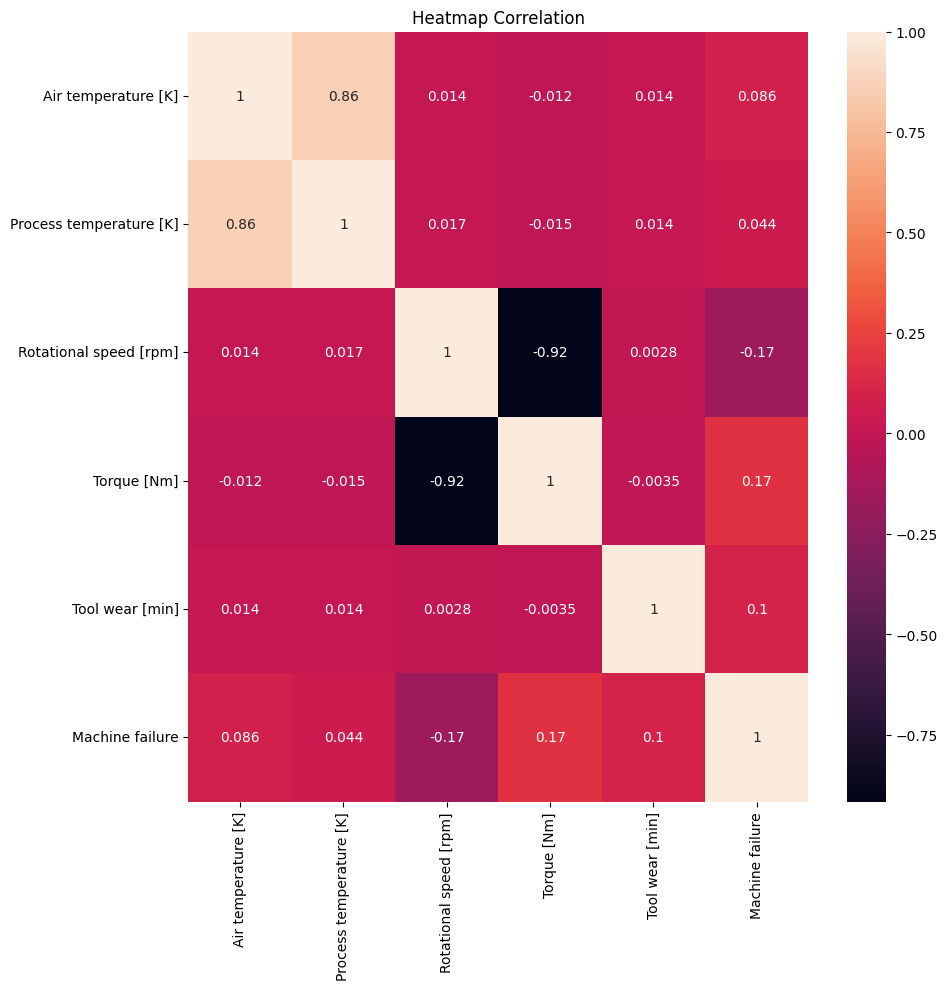

In [ ]:
# Heatmap untuk melihat korelasi antar fitur
plt.figure(figsize=(10, 10))
sns.heatmap(df1.corr('spearman'), annot=True)
plt.title('Heatmap Correlation')
plt.show()

**Insight:**

Korelasi tertinggi terjadi pada fitur 'Rotational speed [rpm]' dengan fitur 'Torque [Nm]' dengan nilai sebesar -0,92 yang mengindikasikan hubungan negatif yang kuat. Selain itu, korelasi antara 'Air temperature [K]' dan 'Process temperature [K]' juga memiliki nilai korelasi tinggi sebesar 0,86 namun dengan arah hubungan yang positif.

Selanjutnya, akan dilihat distribusi dari masing-masing fitur numerik menggunakan histogram dan boxplot.


Air temperature [K] skewness = 0.11
Process temperature [K] skewness = 0.02
Rotational speed [rpm] skewness = 1.99
Torque [Nm] skewness = -0.01
Tool wear [min] skewness = 0.03


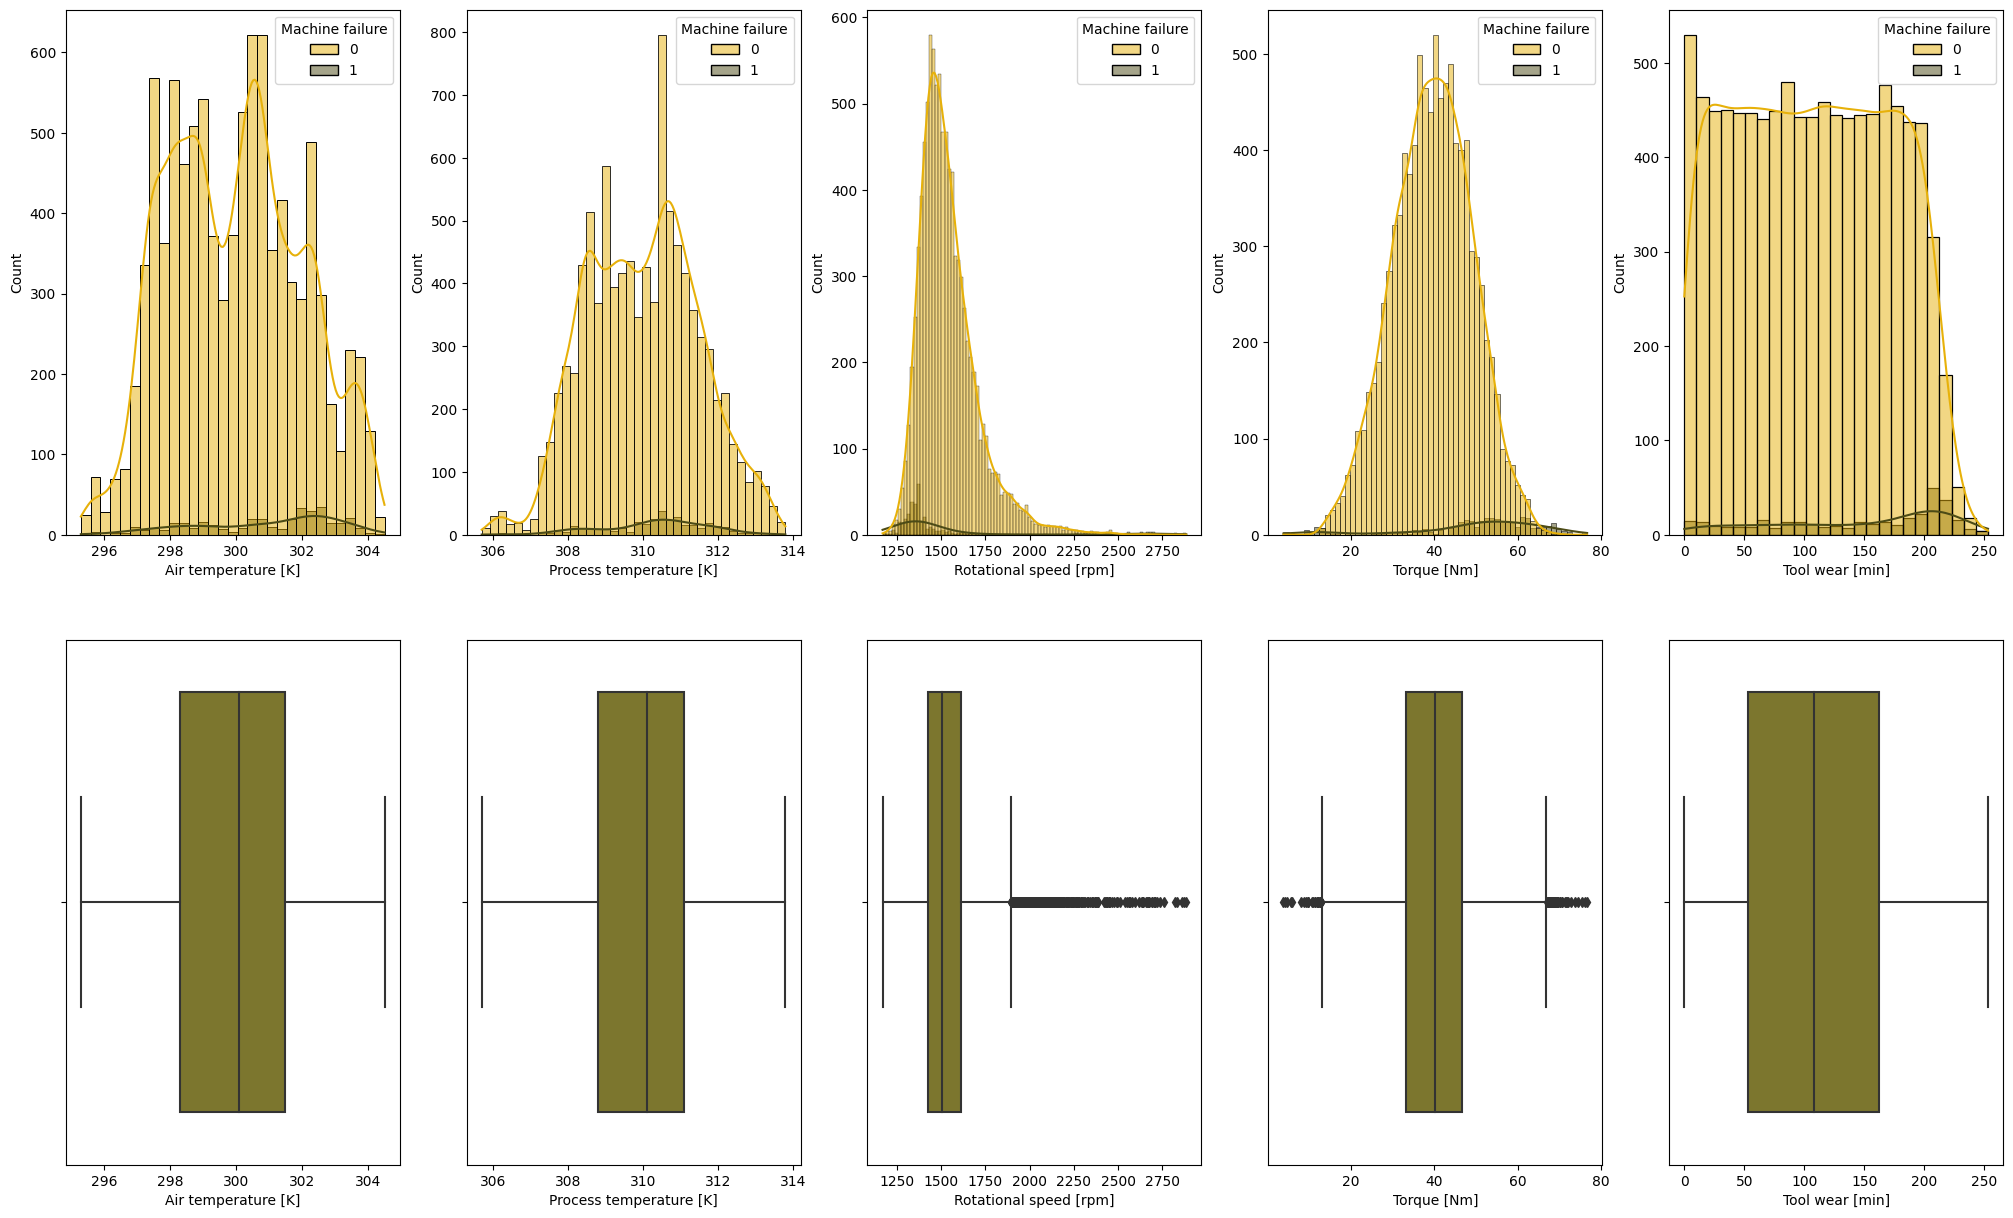

In [ ]:
# Distribusi masing-masing fitur numerik
fig, axes = plt.subplots(2, 5, figsize=[25,15])
j = 0
colors = ['#E7B10A', '#4C4B16']

for i in ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']:
    sns.histplot(data=df1, x=i, kde=True, ax=axes[0,j], hue='Machine failure', palette=colors)
    sns.boxplot(data=df1, x=i, ax=axes[1,j], palette=['#898121'])
    j+=1
    print('{} skewness = {}'.format(i, round(df[i].skew(), 2)))

**Insight:**



*   Seluruh fitur numerik cenderung berdistribusi normal, kecuali fitur 'Roational speed [rpm]' memiliki distribusi yang right skewed.
*   Fitur 'Rotational speed [rpm]' dan 'Torque [Nm]' memiliki pengamatan yang tergolong sebagai outlier.



Visualisasi selanjutnya adalah eksplorasi untuk melihat pola hubungan pada setiap fitur numerik menggunakan scatterplot. Visualisasi ini bertujuan untuk menggambarkan nilai korelasi antar 2 fitur yang telah diperoleh melalui Heatmap sebelumnya.

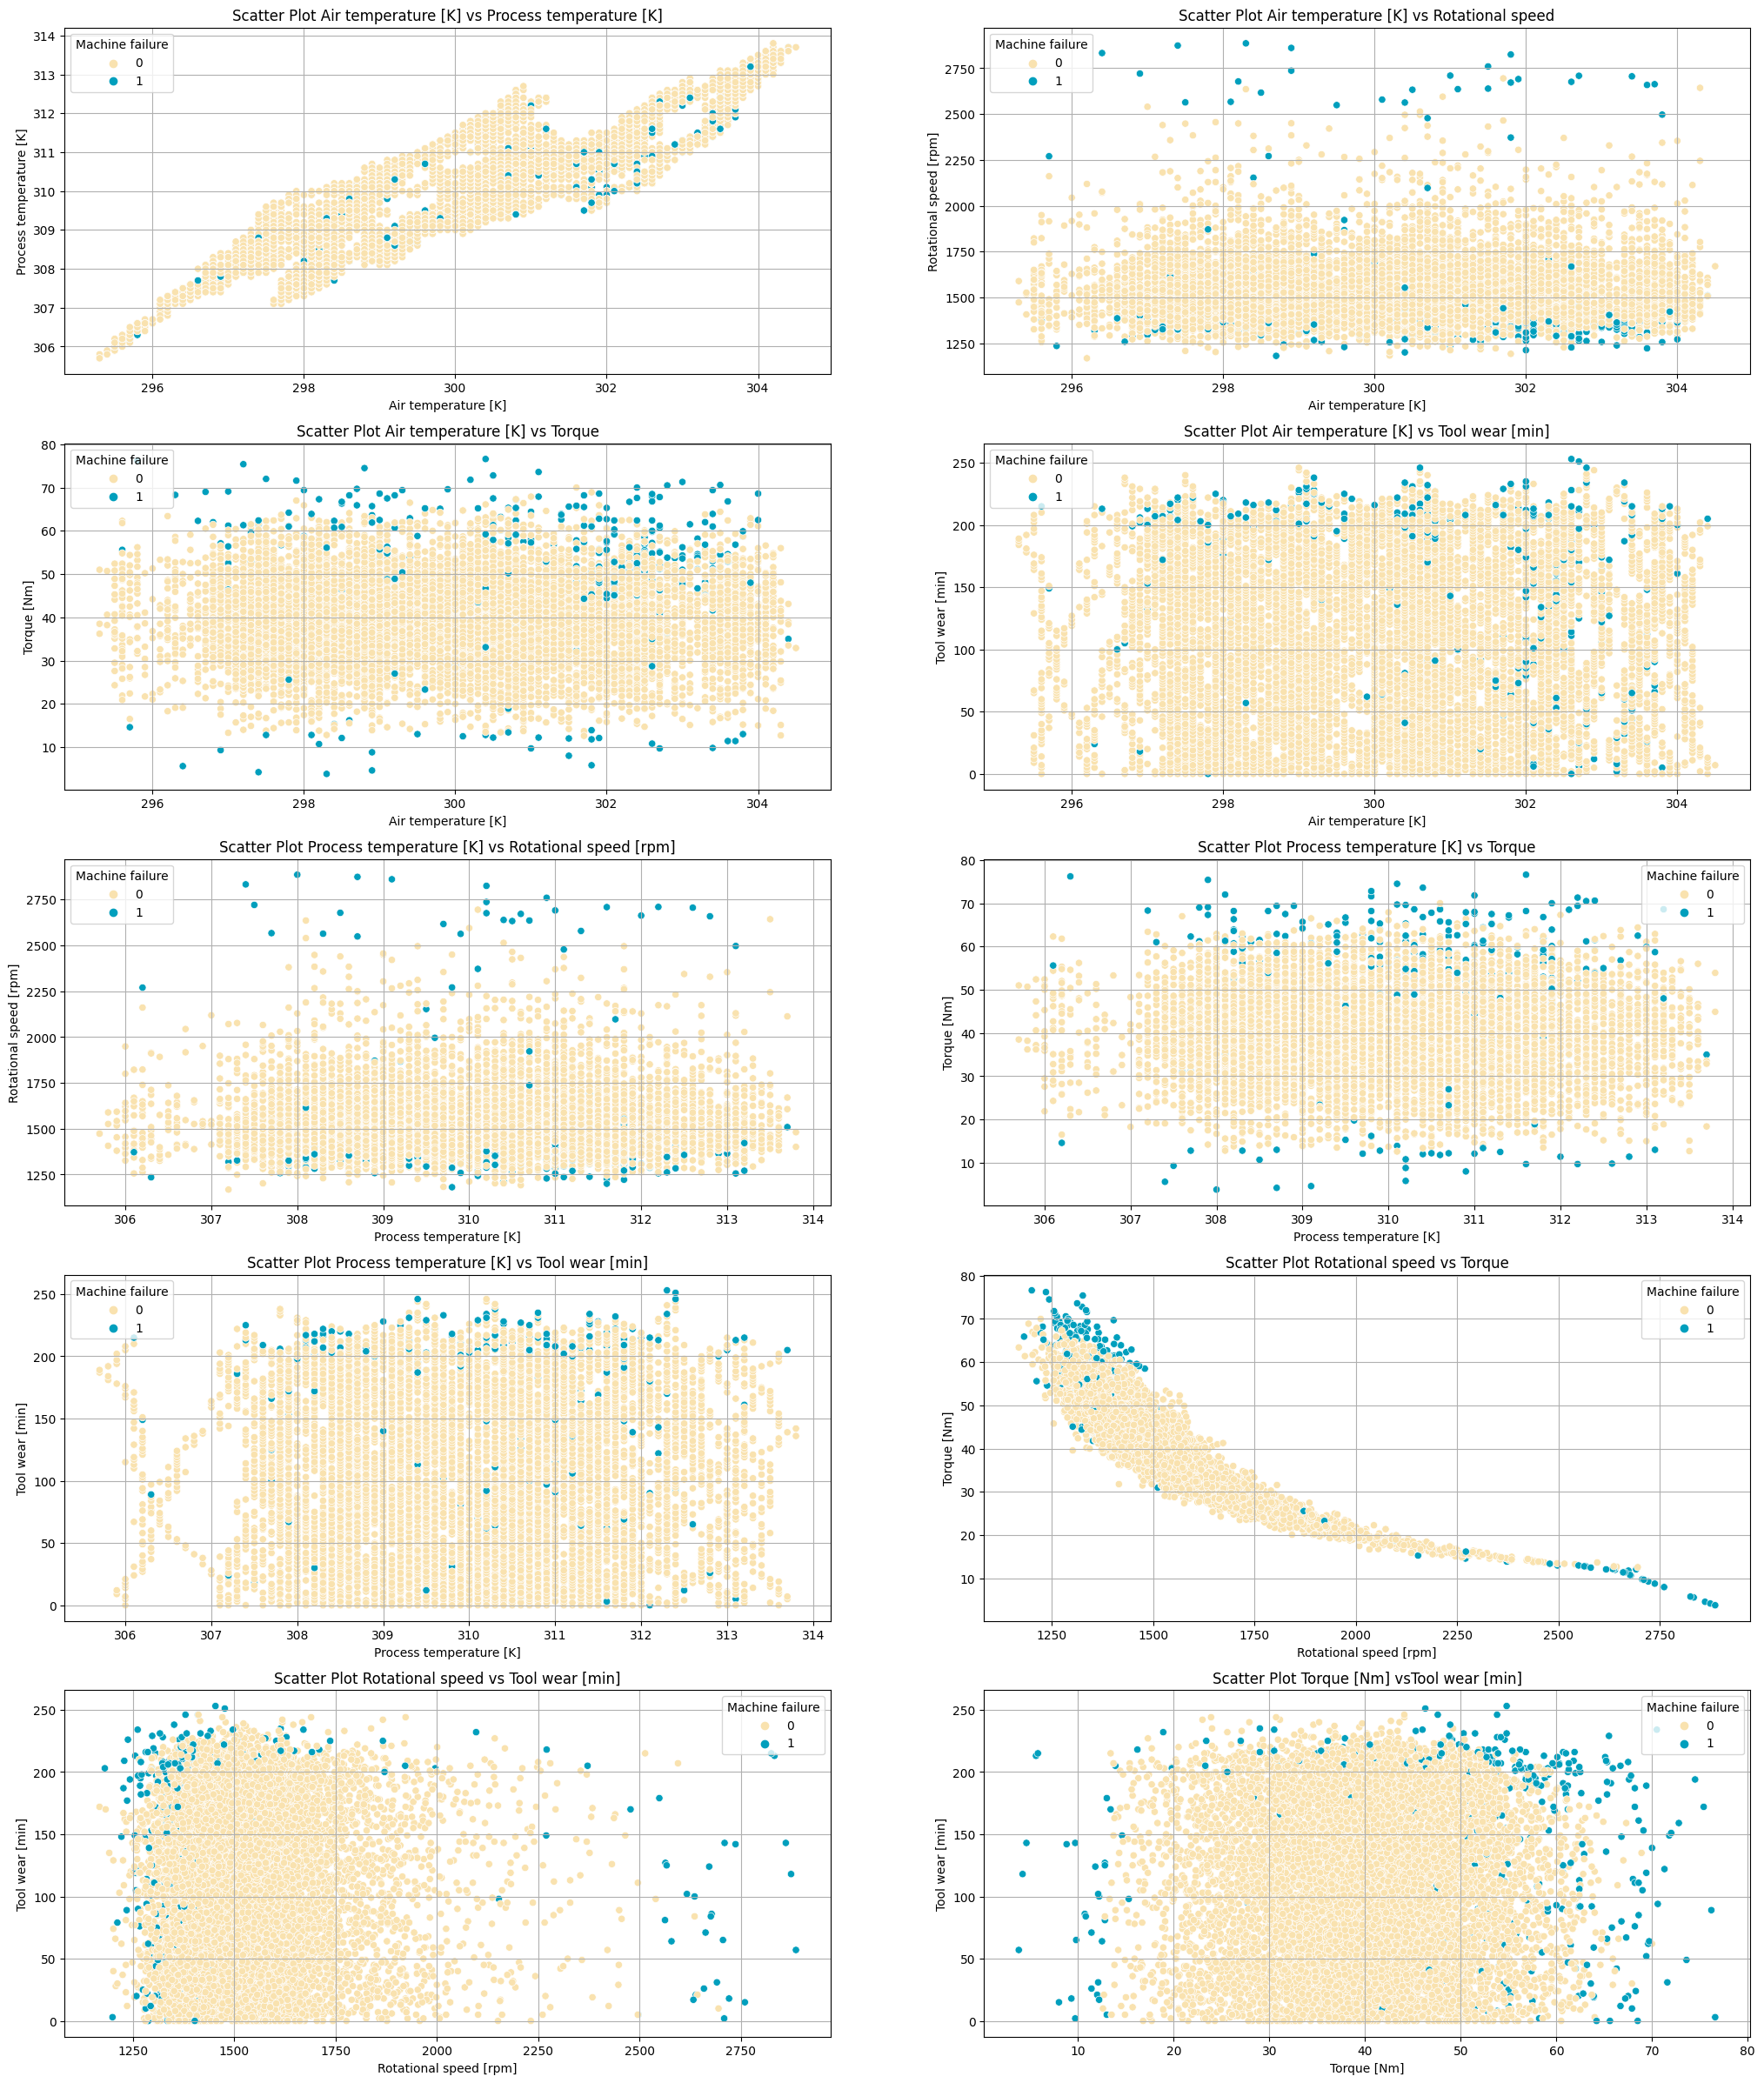

In [ ]:
# Scatter Plot pada masing-masing fitur numerik
plt.rcParams["figure.figsize"] = (25,30)

plt.subplot(5,2,1)
plt.title('Scatter Plot Air temperature [K] vs Process temperature [K]')
sns.scatterplot(data=df1, x='Air temperature [K]', y='Process temperature [K]', hue='Machine failure', palette=['#F9E2AF', '#009FBD'])
plt.grid()

plt.subplot(5,2,2)
plt.title('Scatter Plot Air temperature [K] vs Rotational speed')
sns.scatterplot(data=df1, x='Air temperature [K]', y='Rotational speed [rpm]', hue='Machine failure', palette=['#F9E2AF', '#009FBD'])
plt.grid()

plt.subplot(5,2,3)
plt.title('Scatter Plot Air temperature [K] vs Torque')
sns.scatterplot(data=df1, x='Air temperature [K]', y='Torque [Nm]', hue='Machine failure', palette=['#F9E2AF', '#009FBD'])
plt.grid()

plt.subplot(5,2,4)
plt.title('Scatter Plot Air temperature [K] vs Tool wear [min]')
sns.scatterplot(data=df1, x='Air temperature [K]', y='Tool wear [min]', hue='Machine failure', palette=['#F9E2AF', '#009FBD'])
plt.grid()

plt.subplot(5,2,5)
plt.title('Scatter Plot Process temperature [K] vs Rotational speed [rpm]')
sns.scatterplot(data=df1, x='Process temperature [K]', y='Rotational speed [rpm]', hue='Machine failure', palette=['#F9E2AF', '#009FBD'])
plt.grid()

plt.subplot(5,2,6)
plt.title('Scatter Plot Process temperature [K] vs Torque')
sns.scatterplot(data=df1, x='Process temperature [K]', y='Torque [Nm]', hue='Machine failure', palette=['#F9E2AF', '#009FBD'])
plt.grid()

plt.subplot(5,2,7)
plt.title('Scatter Plot Process temperature [K] vs Tool wear [min]')
sns.scatterplot(data=df1, x='Process temperature [K]', y='Tool wear [min]', hue='Machine failure', palette=['#F9E2AF', '#009FBD'])
plt.grid()

plt.subplot(5,2,8)
plt.title('Scatter Plot Rotational speed vs Torque')
sns.scatterplot(data=df1, x='Rotational speed [rpm]', y='Torque [Nm]', hue='Machine failure', palette=['#F9E2AF', '#009FBD'])
plt.grid()

plt.subplot(5,2,9)
plt.title('Scatter Plot Rotational speed vs Tool wear [min]')
sns.scatterplot(data=df1, x='Rotational speed [rpm]', y='Tool wear [min]', hue='Machine failure', palette=['#F9E2AF', '#009FBD'])
plt.grid()

plt.subplot(5,2,10)
plt.title('Scatter Plot Torque [Nm] vsTool wear [min]')
sns.scatterplot(data=df1, x='Torque [Nm]', y='Tool wear [min]', hue='Machine failure', palette=['#F9E2AF', '#009FBD'])
plt.grid()

**Insight:**

Berdasarkan scatterplot, hanya pasangan fitur  'Rotational speed [rpm]' vs fitur 'Torque [Nm]' dan 'Air temperature [K]' vs 'Process temperature [K]' yang memiliki pola hubungan linier. Hal ini sesuai dengan perhitungan nilai korelasi pada visualisasi Heatmap sebelumnya yang menyatakan bahwa kedua pasang fitur tersebut memiliki hubungan linier yang sangat kuat.


Kemudian, akan dilakukan visualisasi menggunakan pie chart pada fitur 'Type' untuk mengetahui persentase masing-masing jenis produk (L,M, dan H).

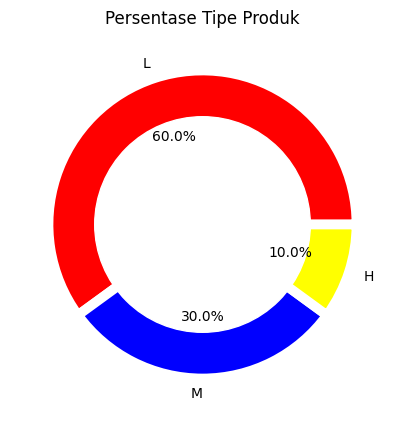

In [ ]:
# Persentase Jenis Produk
plt.rcParams["figure.figsize"] = (5,5)
colors = ['#FF0000', '#0000FF', '#FFFF00']
my_circle = plt.Circle( (0,0), 0.7, color='white')
plt.pie(df1['Type'].value_counts(), labels=['L', 'M', 'H'], colors=colors,
    autopct='%1.1f%%', wedgeprops={'linewidth' : 7, 'edgecolor': 'white'})
plt.title('Persentase Tipe Produk')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

**Insight:**

* Produk dengan tipe L atau Low merupkan tipe produk terbanyak (60%) dari keseluruhan produk yang diteliti.
* Tipe produk H atau High menjadi yang paling sedikit (10%).

Masih menggunakan pie chart, akan dilakukan visualisasi data pada masing-masing tipe produk berdasarkan fitur 'Machine failure'.

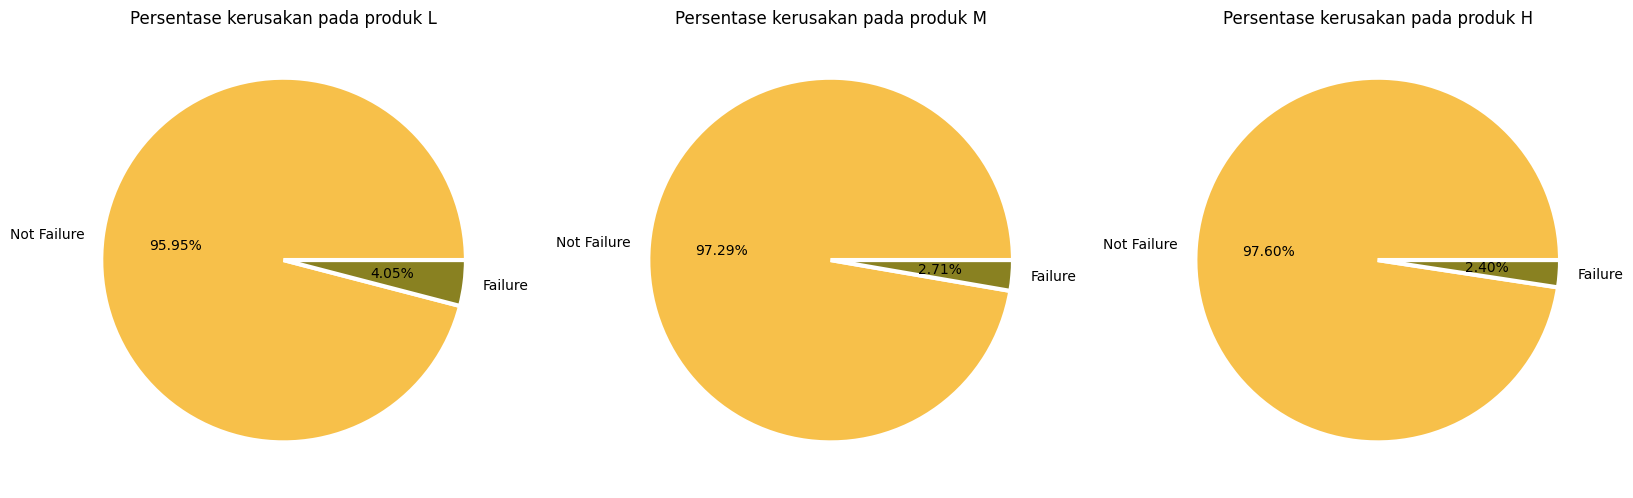

In [ ]:
# Persentase Tipe Produk berdasarkan Status Kerusakan
fig, axes = plt.subplots(1,3, figsize=[20,15])
axes.flatten()
j=0
colors = ['#F7C04A','#898121']
for i in ['L', 'M', 'H']:
    df_product_type = df1[df1['Type'] == i]
    axes[j].pie(df_product_type['Machine failure'].value_counts(), labels=['Not Failure', 'Failure'],
                autopct='%1.2f%%', wedgeprops={'linewidth' : 3, 'edgecolor': 'white'},
                colors=colors)
    axes[j].set_title('Persentase kerusakan pada produk ' + i)
    j+=1

**Insight:**

* Kerusakan terbesar terjadi pada produk dengan Tipe H (High) atau 98% dari keseluruhan produk yang bertipe High.
* Seluruh tipe produk mengalami kerusakan diatas 95% produk.

## Feature Engineering

Pada tahap ini, akan dilakukan Encoding pada fitur kategorik. Selain itu, akan dilakuakn penskalaan pada fitur numerik.

### Ordinal Encoder

Digunakan pada fitur 'Type' karena fitur tersebut memiliki tingkatan kelas (Low/L, Medium/M, High/H).

In [ ]:
# Oridnal Encoder pada fitur Type
from category_encoders import OrdinalEncoder
maplist = [{'col': 'Type', 'mapping': {'L': 0, 'M': 1,'H': 2}}]
oe = OrdinalEncoder(mapping=maplist)
df1['New_Type'] = oe.fit_transform(df1['Type'])
df1['New_Type'].value_counts()

0    5996
1    2993
2    1002
Name: New_Type, dtype: int64

**Insight:**

Kini, fitur 'New_Type' yang semula bernama 'Type' dengan kelas L, M, H berubah memiliki kelas dengan nama 0,1,2 setelah dilakukan OrdinalEncoder. Dikarenakan sudah terdapat fitur 'New_Type' yang menggantikan fitur 'Type', maka fitur 'Type' akan didrop dari dataset.

In [ ]:
# Drop fitur Type
df2 = df1.drop(columns=['Type'])
df2

Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0                   298.1                    308.6                    1551   
1                   298.2                    308.7                    1408   
2                   298.1                    308.5                    1498   
3                   298.2                    308.6                    1433   
4                   298.2                    308.7                    1408   
...                   ...                      ...                     ...   
9995                298.8                    308.4                    1604   
9996                298.9                    308.4                    1632   
9997                299.0                    308.6                    1645   
9998                299.0                    308.7                    1408   
9999                299.0                    308.7                    1500   

      Torque [Nm]  Tool wear [min]  Machine failure  New_Type  
0            42.8                0                0         1  
1            46.3                3                0         0  
2            49.4                5                0         0  
3            39.5                7                0         0  
4            40.0                9                0         0  
...           ...              ...              ...       ...  
9995         29.5               14                0         1  
9996         31.8               17                0         2  
9997         33.4               22                0         1  
9998         48.5               25                0         2  
9999         40.2               30                0         1  

[9991 rows x 7 columns]

### Standarization

Pada tahapan ini akan dilakukan standarisasi pada fitur numerik. Khusus pada fitur 'Rotational speed [rpm]' dan 'Torque [Nm]' akan dilakukan standarisasi dengan RobustScaler karena kedua fitur tersebut memiliki outlier. Sedangkan fitur numerik lainnya akan distandarisasi dengan StandardScaler.

In [ ]:
# Feature Engineering
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler
sc=StandardScaler() # Standardize
rb=RobustScaler() # Agar robust terhadap outlier
df2[['Air temperature [K]', 'Process temperature [K]', 'Tool wear [min]']]=sc.fit_transform(df1[['Air temperature [K]', 'Process temperature [K]', 'Tool wear [min]']])
df2[['Rotational speed [rpm]', 'Torque [Nm]']]=rb.fit_transform(df1[['Rotational speed [rpm]', 'Torque [Nm]']])
df2

Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0               -0.952222                -0.947078                0.253968   
1               -0.902227                -0.879689               -0.502646   
2               -0.952222                -1.014468               -0.026455   
3               -0.902227                -0.947078               -0.370370   
4               -0.902227                -0.879689               -0.502646   
...                   ...                      ...                     ...   
9995            -0.602257                -1.081857                0.534392   
9996            -0.552262                -1.081857                0.682540   
9997            -0.502267                -0.947078                0.751323   
9998            -0.502267                -0.879689               -0.502646   
9999            -0.502267                -0.879689               -0.015873   

      Torque [Nm]  Tool wear [min]  Machine failure  New_Type  
0        0.200000        -1.695786                0         1  
1        0.459259        -1.648656                0         0  
2        0.688889        -1.617236                0         0  
3       -0.044444        -1.585816                0         0  
4       -0.007407        -1.554395                0         0  
...           ...              ...              ...       ...  
9995    -0.785185        -1.475845                0         1  
9996    -0.614815        -1.428715                0         2  
9997    -0.496296        -1.350165                0         1  
9998     0.622222        -1.303034                0         2  
9999     0.007407        -1.224484                0         1  

[9991 rows x 7 columns]

## Feature Selection

Pada tahapan ini, akan dilakukan seleski fitur menggunakan koefisien korelasi. Fitur dengan skor korelasi terendah akan dihapus dari dataset.



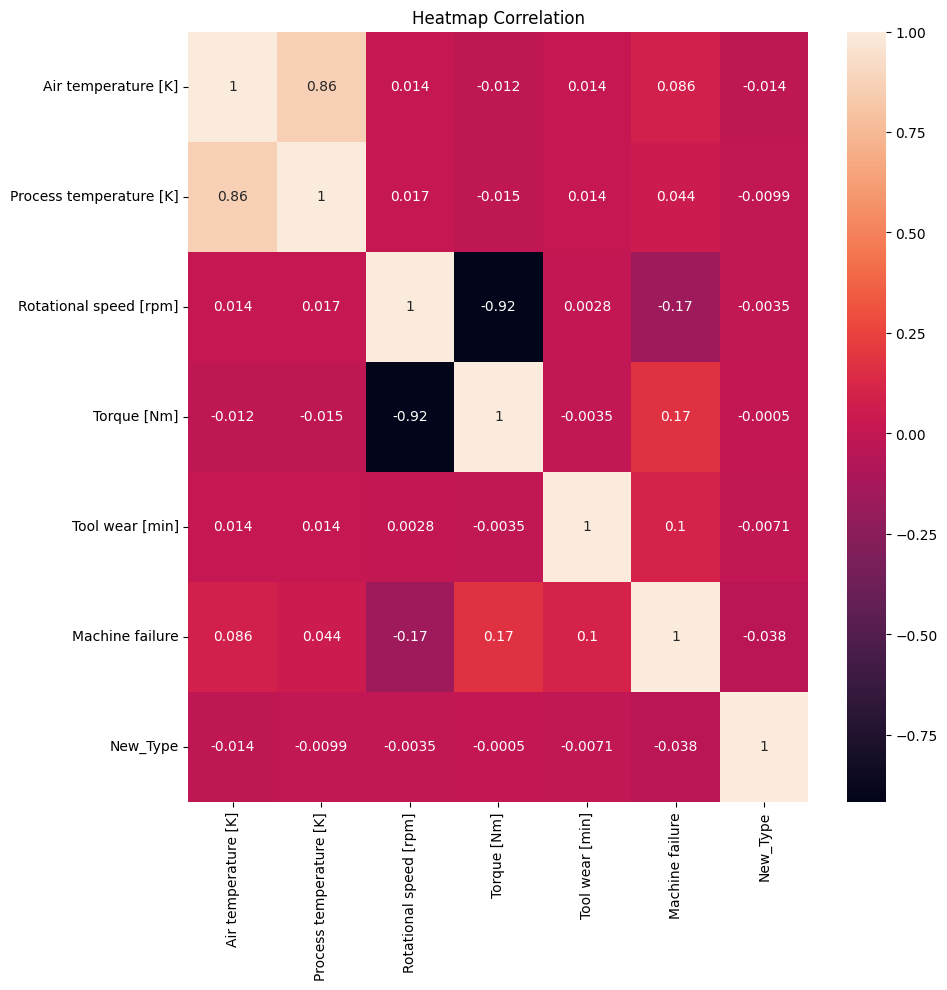

In [ ]:
# Heatmap untuk melihat korelasi antar fitur dengan Machine Failure
plt.figure(figsize=(10, 10))
sns.heatmap(df2.corr('spearman'), annot=True)
plt.title('Heatmap Correlation')
plt.show()

In [ ]:
# Drop fitur yang memiliki korelasi < 0,1, khusus fitur Air & Process temperature tidak bisa di drop, karena pada data understanding, kedua fitur tersebut berpengaruh pada kegagalan jenis HDF
df3 = df2.drop(columns=df2[['New_Type']])
df3

Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0               -0.952222                -0.947078                0.253968   
1               -0.902227                -0.879689               -0.502646   
2               -0.952222                -1.014468               -0.026455   
3               -0.902227                -0.947078               -0.370370   
4               -0.902227                -0.879689               -0.502646   
...                   ...                      ...                     ...   
9995            -0.602257                -1.081857                0.534392   
9996            -0.552262                -1.081857                0.682540   
9997            -0.502267                -0.947078                0.751323   
9998            -0.502267                -0.879689               -0.502646   
9999            -0.502267                -0.879689               -0.015873   

      Torque [Nm]  Tool wear [min]  Machine failure  
0        0.200000        -1.695786                0  
1        0.459259        -1.648656                0  
2        0.688889        -1.617236                0  
3       -0.044444        -1.585816                0  
4       -0.007407        -1.554395                0  
...           ...              ...              ...  
9995    -0.785185        -1.475845                0  
9996    -0.614815        -1.428715                0  
9997    -0.496296        -1.350165                0  
9998     0.622222        -1.303034                0  
9999     0.007407        -1.224484                0  

[9991 rows x 6 columns]

# Data Imbalanced Tanpa Feature Selection

Pada tahapan ini, akan dilakukan pemeriksaan apakah fitur 'Machine failure' tidak seimbang jumlah data pada masing-masing kelasnya (imbalanced). Jika terbukti imbalanced, akan dilakukan penanganan.

<Axes: xlabel='index', ylabel='Machine failure'>

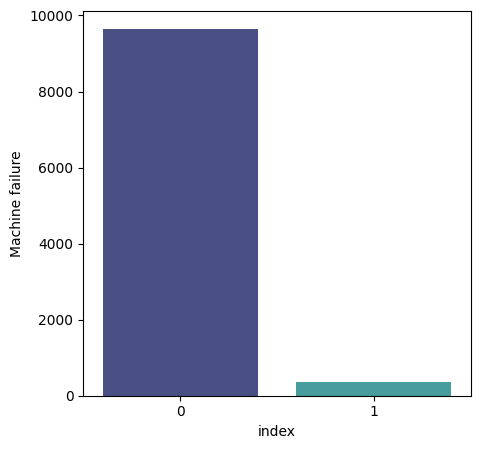

In [ ]:
# Pemeriksaan Data Imbalance pada Fitur Machine Failure (Target)
xx = df2['Machine failure'].value_counts().reset_index()
sns.barplot(x = "index", y = "Machine failure", data = xx, palette = 'mako')

In [ ]:
df2['Machine failure'].value_counts()

0    9643
1     348
Name: Machine failure, dtype: int64

**Insight:**

Output diatas menunjukkan bahwa terjadi kasus imbalanced data. Ternyata, terdapat perbedaan yang sangat mencolok antara banyak mesin yang diprediksi tidak mengalami kerusakan (Label = 0) dengan mesin yang diprediksi mengalami kerusakan (Label = 1). Sehingga, diperlukan penanganan agar hasil prediksi menjadi akurat.

Selanjutnya, akan dilakukan penanganan data imbalanced dengan Random Under-Sampling. Pada Random Under-Sampling, jumlah produk yang tidak rusak akan disamakan dengan produk yang rusak, yaitu sebanyak 330 produk.


In [ ]:
# Pembagian data training & testing untuk Random Under-Sampling
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import KFold, StratifiedKFold

# Persentase Rusak dan Tidak Rusak
print('Tidak Rusak', round(df2['Machine failure'].value_counts()[0]/len(df2) * 100,2), '% dari keseluruhan dataset')
print('Rusak', round(df2['Machine failure'].value_counts()[1]/len(df2) * 100,2), '% dari keseluruhan dataset')

X = df2.drop('Machine failure', axis=1)
y = df2['Machine failure']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]


Tidak Rusak 96.52 % dari keseluruhan dataset
Rusak 3.48 % dari keseluruhan dataset
Train: [1982 1983 1984 ... 9988 9989 9990] Test: [   0    1    2 ... 2501 2558 2580]
Train: [   0    1    2 ... 9988 9989 9990] Test: [1982 1983 1984 ... 4208 4222 4244]
Train: [   0    1    2 ... 9988 9989 9990] Test: [3964 3965 3966 ... 6047 6048 6049]
Train: [   0    1    2 ... 9988 9989 9990] Test: [4714 4716 4719 ... 8024 8025 8026]
Train: [   0    1    2 ... 8024 8025 8026] Test: [6666 6671 6752 ... 9988 9989 9990]


**Insight:**

Persentase produk yang tidak rusak sangatlah tinggi (96.52%) jika dibandingkan dengan produk yang rusak (3.48%).

In [ ]:
# Membuat Array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# Melihat proporsi produk Rusak dan Tidak Rusak pada data training & testing
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Proporsi Label: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

----------------------------------------------------------------------------------------------------
Proporsi Label: 

[0.96521957 0.03478043]
[0.96496496 0.03503504]


**Insight:**

Persentase label Tidak Rusak (0) dan Rusak (1) pada data training dan testing tidak seimbang.

Selanjutnya, akan dibuat dataframe baru dengan melakukan Random Under-Sampling. Label Tidak Rusak (0) akan dikurangi sehingga dapat seimbang dengan label Rusak (1).

In [ ]:
# Mengacak data
df2 = df2.sample(frac=1)

# Menyeimbangkan kelas Tidak Rusak (0) menjadi 348 data
failure_df = df2.loc[df2['Machine failure'] == 1]
non_failure_df = df2.loc[df2['Machine failure'] == 0][:348]

normal_distributed_df = pd.concat([failure_df, non_failure_df])

# Dataframe baru hasil Random Under-Sampling
new_df = normal_distributed_df.sample(frac=1, random_state=42)
new_df

Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
679             -1.102207                -0.542743               -0.693122   
4328             0.797603                 0.063760               -0.936508   
6343             0.097673                -0.138407                1.714286   
6963             0.347648                 0.670264                2.529101   
6770             0.647618                 0.535485                0.031746   
...                   ...                      ...                     ...   
2858             0.247658                -0.475354               -0.455026   
5490             1.297553                 1.411546               -1.137566   
4556             1.347548                 0.400707               -0.814815   
708             -1.202197                -0.812300               -0.460317   
8245            -0.502267                 0.198539               -1.058201   

      Torque [Nm]  Tool wear [min]  Machine failure  New_Type  
679      0.533333        -1.460135                0         0  
4328     0.600000        -0.486111                1         0  
6343    -1.266667        -1.601526                0         0  
6963    -1.496296        -0.140490                0         2  
6770     0.000000        -1.303034                0         1  
...           ...              ...              ...       ...  
2858     0.844444         1.933239                1         0  
5490     2.103704        -1.695786                1         0  
4556     0.822222        -1.601526                1         1  
708      0.429630        -0.109069                0         1  
8245     2.111111         0.048031                1         1  

[696 rows x 7 columns]

**Insight:**

Setelah dilakukan Random Under-Sampling, dataset memiliki jumlah pengamatan sebanyak 660 dari yang sebelumnya 9973 pengamatan.

Setelah dibentuk dataframe baru, akan dilakukan pengecekan kembali apakah dataframe sudah tidak mengalami kasus data imbalanced.

Distribution of the Classes in the subsample dataset
0    0.5
1    0.5
Name: Machine failure, dtype: float64


Text(0.5, 1.0, 'Class Distributions \n (0: No Failure || 1: Failure)')

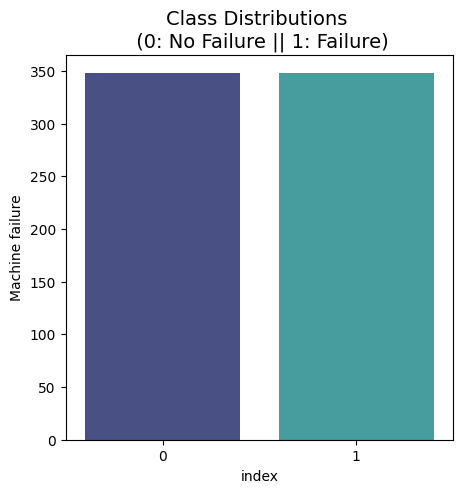

In [ ]:
# Pemeriksaan jumlah data pada masing-masing kelas
print('Distribution of the Classes in the subsample dataset')
print(new_df['Machine failure'].value_counts()/len(new_df))

xx1 = new_df['Machine failure'].value_counts().reset_index()
sns.barplot(x = "index", y = "Machine failure", data = xx1, palette = 'mako')
plt.title('Class Distributions \n (0: No Failure || 1: Failure)', fontsize=14)

**Insight:**

Dataframe yang baru telah memiliki jumlah data pada masing-masing kelas yang sama. Dengan kata lain, sudah tidak terjadi kasus data imbalanced.

Kemudian, akan dilakukan visualisasi data kembali pada data yang telah dilakukan balancing yang meliputi distribusi dari fitur numerik dan nilai korelasi antar fitur numerik.

Air temperature [K] skewness = 0.11
Torque [Nm] skewness = -0.01
Tool wear [min] skewness = 0.03


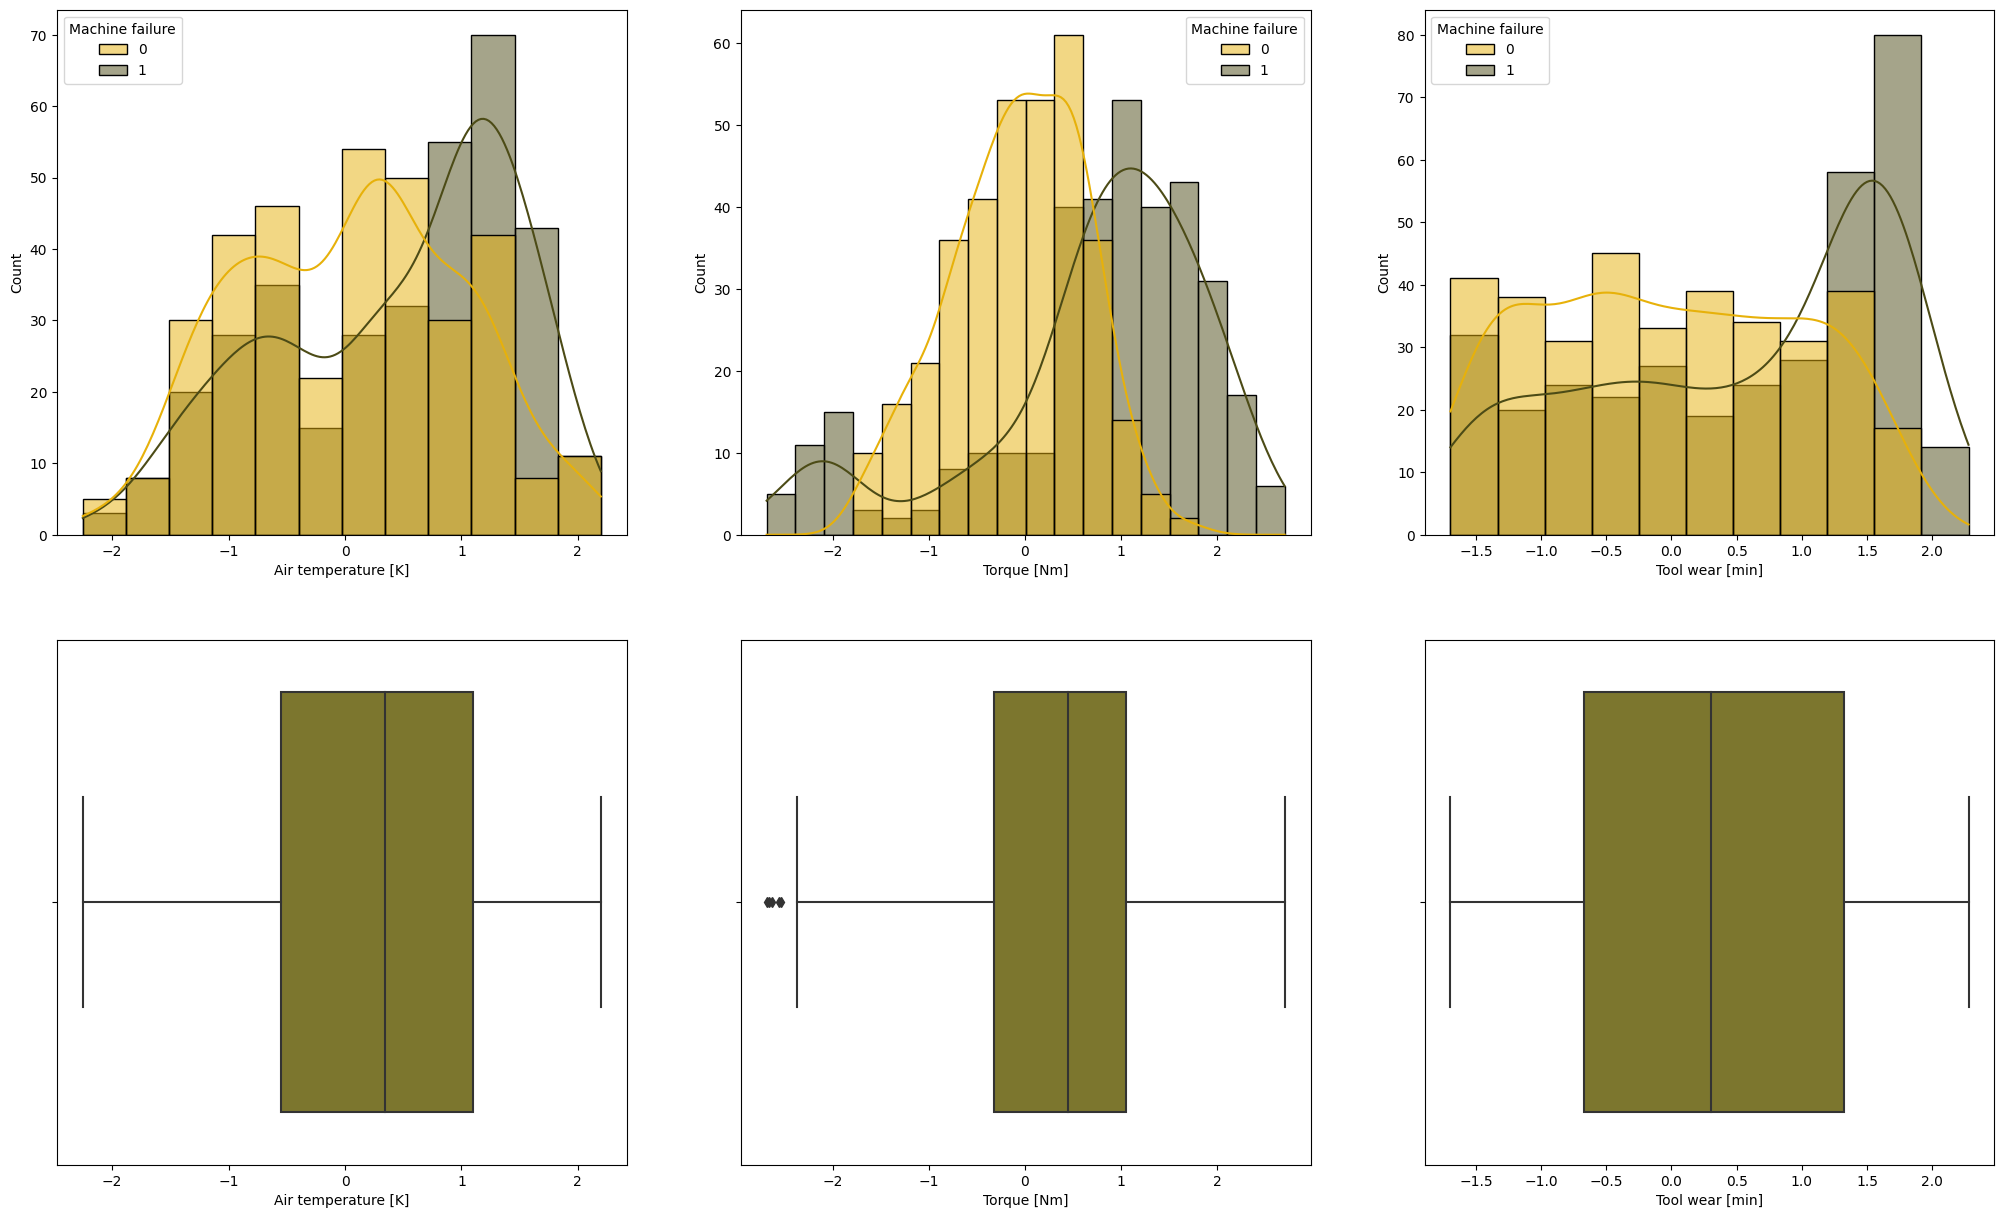

In [ ]:
# Distribusi masing-masing fitur numerik menggunakan Histogram dan Boxplot
fig, axes = plt.subplots(2, 3, figsize=[25,15])
j = 0
colors = ['#E7B10A', '#4C4B16']

for i in ['Air temperature [K]', 'Torque [Nm]', 'Tool wear [min]']:
    sns.histplot(data=new_df, x=i, kde=True, ax=axes[0,j], hue='Machine failure', palette=colors)
    sns.boxplot(data=new_df, x=i, ax=axes[1,j], palette=['#898121'])
    j+=1
    print('{} skewness = {}'.format(i, round(df[i].skew(), 2)))

**Insight:**

Setelah data dilakukan balancing, seluruh fitur numerik kini memiliki distribusi data yang cenderung normal.

# Data Imbalanced Dengan Feature Selection

Tahapan sama dengan tanpa fitur selection. Sehingga, hanya cukup dibentuk dataset yang baru bernama 'new_df1'.

In [ ]:
new_df1 = new_df.drop(columns=new_df[['New_Type']])
new_df1

Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
679             -1.102207                -0.542743               -0.693122   
4328             0.797603                 0.063760               -0.936508   
6343             0.097673                -0.138407                1.714286   
6963             0.347648                 0.670264                2.529101   
6770             0.647618                 0.535485                0.031746   
...                   ...                      ...                     ...   
2858             0.247658                -0.475354               -0.455026   
5490             1.297553                 1.411546               -1.137566   
4556             1.347548                 0.400707               -0.814815   
708             -1.202197                -0.812300               -0.460317   
8245            -0.502267                 0.198539               -1.058201   

      Torque [Nm]  Tool wear [min]  Machine failure  
679      0.533333        -1.460135                0  
4328     0.600000        -0.486111                1  
6343    -1.266667        -1.601526                0  
6963    -1.496296        -0.140490                0  
6770     0.000000        -1.303034                0  
...           ...              ...              ...  
2858     0.844444         1.933239                1  
5490     2.103704        -1.695786                1  
4556     0.822222        -1.601526                1  
708      0.429630        -0.109069                0  
8245     2.111111         0.048031                1  

[696 rows x 6 columns]

# Modelling Tanpa Feature Selection

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 696 entries, 679 to 8245
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Air temperature [K]      696 non-null    float64
 1   Process temperature [K]  696 non-null    float64
 2   Rotational speed [rpm]   696 non-null    float64
 3   Torque [Nm]              696 non-null    float64
 4   Tool wear [min]          696 non-null    float64
 5   Machine failure          696 non-null    int64  
 6   New_Type                 696 non-null    int64  
dtypes: float64(5), int64(2)
memory usage: 43.5 KB


## Random Forest

In [ ]:
# Splitting data menjadi training dan testing
X1 = new_df.drop('Machine failure', axis=1)
y1 = new_df['Machine failure']
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [ ]:
X1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 696 entries, 679 to 8245
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Air temperature [K]      696 non-null    float64
 1   Process temperature [K]  696 non-null    float64
 2   Rotational speed [rpm]   696 non-null    float64
 3   Torque [Nm]              696 non-null    float64
 4   Tool wear [min]          696 non-null    float64
 5   New_Type                 696 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 38.1 KB


In [ ]:
y1.info()

<class 'pandas.core.series.Series'>
Int64Index: 696 entries, 679 to 8245
Series name: Machine failure
Non-Null Count  Dtype
--------------  -----
696 non-null    int64
dtypes: int64(1)
memory usage: 10.9 KB


In [ ]:
print(len(X1))
print(len(y1))

696
696


###Base Model

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.86      0.89        71
           1       0.86      0.93      0.90        69

    accuracy                           0.89       140
   macro avg       0.89      0.89      0.89       140
weighted avg       0.89      0.89      0.89       140

Accuracy Score: 0.8928571428571429
time to train: 0.45 s
time to predict: 0.02 s


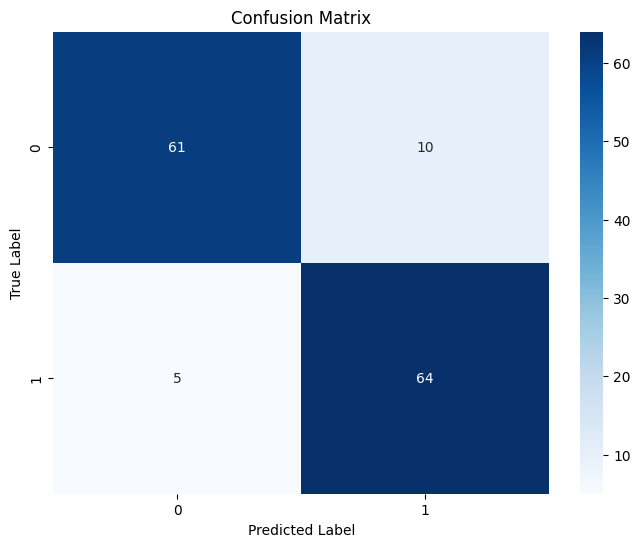

In [ ]:
# Train model
start = time.time()
rf = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
rf.fit(X_train, y_train)
end_train = time.time()

# Predict on test set
rf_pred = rf.predict(X_test)
end_predict = time.time()

# Generate confusion matrix, classification report, and accuracy score
cm = confusion_matrix(y_test, rf_pred)
cr = classification_report(y_test, rf_pred)
accuracy = accuracy_score(y_test, rf_pred)

print('Classification Report:\n', cr)
print('Accuracy Score:', accuracy)
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Menampilkan learning curve dari model Random Forest

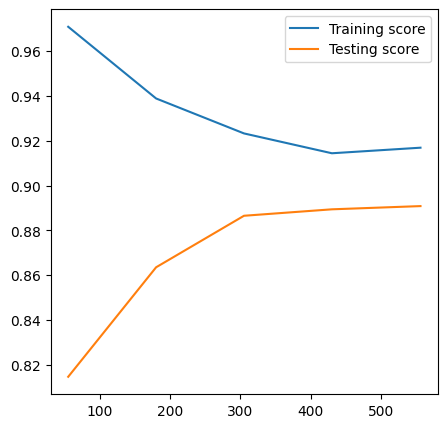

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(rf, X1, y1, cv=5)

# plot the learning curve
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Testing score')
plt.legend(loc='best')
plt.show()

###Cross-Validation & Bootstrapping


In [ ]:
# Cross-validation
cross_val_scores_rf = cross_val_score(rf, X1, y1, cv=10)
print("Cross-validation scores:", cross_val_scores_rf)
print("Average cross-validation score:", np.mean(cross_val_scores_rf))

# Bootstrapping
bootstrap_scores_rf = []
for i in range(100):
    X_sample, y_sample = resample(X_train, y_train, replace=True, n_samples=100, random_state=i)
    rf.fit(X_sample, y_sample)
    y_pred_rf = rf.predict(X_test)
    score = accuracy_score(y_test, y_pred_rf)
    bootstrap_scores_rf.append(score)

print("Bootstrap scores:", bootstrap_scores_rf)
print("Average bootstrap score:", np.mean(bootstrap_scores_rf))

Cross-validation scores: [0.9        0.84285714 0.85714286 0.88571429 0.94285714 0.94285714
 0.86956522 0.84057971 0.89855072 0.89855072]
Average cross-validation score: 0.8878674948240166
Bootstrap scores: [0.8285714285714286, 0.7857142857142857, 0.8071428571428572, 0.8142857142857143, 0.8428571428571429, 0.85, 0.7928571428571428, 0.7857142857142857, 0.8571428571428571, 0.8, 0.8071428571428572, 0.8071428571428572, 0.8642857142857143, 0.8571428571428571, 0.8357142857142857, 0.8214285714285714, 0.7928571428571428, 0.8428571428571429, 0.8357142857142857, 0.8142857142857143, 0.8857142857142857, 0.8071428571428572, 0.8428571428571429, 0.7571428571428571, 0.8428571428571429, 0.8071428571428572, 0.8285714285714286, 0.8714285714285714, 0.8, 0.8, 0.7714285714285715, 0.7785714285714286, 0.7785714285714286, 0.8, 0.8714285714285714, 0.7642857142857142, 0.7714285714285715, 0.8642857142857143, 0.8, 0.8, 0.7642857142857142, 0.7642857142857142, 0.8428571428571429, 0.85, 0.8428571428571429, 0.85714285

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

# Cross-validation
cross_val_scores_rf = cross_val_score(rf, X1, y1, cv=10)
print("Cross-validation scores:", cross_val_scores_rf)
print("Average cross-validation score:", np.mean(cross_val_scores_rf))

# Breakdown of classification report for each fold in cross-validation
cv_reports_rf = []
for fold_idx, score in enumerate(cross_val_scores_rf):
    fold_report = f"Fold {fold_idx+1} Classification Report:\n"
    fold_report += classification_report(y1, cross_val_predict(rf, X1, y1, cv=10))
    cv_reports_rf.append(fold_report)

for fold_report in cv_reports_rf:
    print(fold_report)

# Bootstrapping
bootstrap_scores_rf = []
bootstrap_reports_rf = []
for i in range(100):
    X_sample, y_sample = resample(X_train, y_train, replace=True, n_samples=100, random_state=i)
    rf.fit(X_sample, y_sample)
    y_pred_rf = rf.predict(X_test)
    score = accuracy_score(y_test, y_pred_rf)
    bootstrap_scores_rf.append(score)
    bootstrap_reports_rf.append(f"Bootstrap {i+1} Classification Report:\n{classification_report(y_test, y_pred_rf)}")

print("Bootstrap scores:", bootstrap_scores_rf)
print("Average bootstrap score:", np.mean(bootstrap_scores_rf))

for bootstrap_report in bootstrap_reports_rf:
    print(bootstrap_report)

# Cross-validation
cross_val_scores_rf = cross_val_score(rf, X1, y1, cv=10)
print("Cross-validation scores:", cross_val_scores_rf)
print("Average cross-validation score:", np.mean(cross_val_scores_rf))

# Calculate average metrics across cross-validation folds
cv_reports_rf = cross_val_predict(rf, X1, y1, cv=10, method='predict_proba')
cv_metrics_rf = classification_report(y1, np.argmax(cv_reports_rf, axis=1), output_dict=True)
avg_cv_metrics_rf = {metric: np.mean([cv_metrics_rf[str(cls)][metric] for cls in cv_metrics_rf.keys() if cls.isdigit()]) for metric in cv_metrics_rf['0'].keys()}

print("Average Metrics (Cross-validation):")
for metric, value in avg_cv_metrics_rf.items():
    print(f"{metric}: {value}")


# Bootstrapping
bootstrap_scores_rf = []
bootstrap_reports_rf = []

for i in range(100):
    X_sample, y_sample = resample(X_train, y_train, replace=True, n_samples=len(y_test), random_state=i)
    y_pred_rf = rf.predict(X_test)
    score = accuracy_score(y_test, y_pred_rf)
    bootstrap_scores_rf.append(score)
    bootstrap_reports_rf.append((X_sample, y_pred_rf))

print("Bootstrap scores:", bootstrap_scores_rf)
print("Average bootstrap score:", np.mean(bootstrap_scores_rf))

# Calculate average accuracy score
avg_accuracy_rf = np.mean(bootstrap_scores_rf)
print("Average Accuracy (Bootstrapping):", avg_accuracy_rf)

# Calculate average metrics across bootstrapping iterations
class_metrics_sum = {}
num_classes = 0

for iteration in bootstrap_reports_rf:
    _, y_pred = iteration
    report = classification_report(y_sample, y_pred, output_dict=True)
    if num_classes == 0:
        for cls in report.keys():
            if cls.isdigit():
                class_metrics_sum[cls] = {}
                num_classes += 1
    for cls in class_metrics_sum.keys():
        if cls in report:
            for metric, value in report[cls].items():
                if metric != 'support':
                    if metric not in class_metrics_sum[cls]:
                        class_metrics_sum[cls][metric] = value
                    else:
                        class_metrics_sum[cls][metric] += value

avg_bootstrap_metrics_rf = {}
for cls, metrics in class_metrics_sum.items():
    avg_metrics = {metric: value / num_classes for metric, value in metrics.items()}
    avg_bootstrap_metrics_rf[cls] = avg_metrics

print("Average Metrics (Bootstrapping):")
for cls, metrics in avg_bootstrap_metrics_rf.items():
    print(f"Class {cls}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")

Cross-validation scores: [0.9        0.84285714 0.85714286 0.88571429 0.94285714 0.94285714
 0.86956522 0.84057971 0.89855072 0.89855072]
Average cross-validation score: 0.8878674948240166
Fold 1 Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.88      0.89       348
           1       0.88      0.89      0.89       348

    accuracy                           0.89       696
   macro avg       0.89      0.89      0.89       696
weighted avg       0.89      0.89      0.89       696

Fold 2 Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.88      0.89       348
           1       0.88      0.89      0.89       348

    accuracy                           0.89       696
   macro avg       0.89      0.89      0.89       696
weighted avg       0.89      0.89      0.89       696

Fold 3 Classification Report:
              precision    recall  f1-score   support

           0

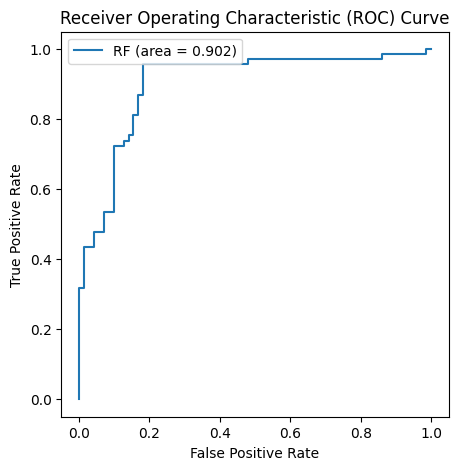

In [ ]:
y_pred_prob_rf = rf.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.plot(fpr_rf, tpr_rf, label='RF (area = %0.3f)' % roc_auc_rf)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='best')
plt.show()

###Hyperparameter Tuning

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best Parameters: {'bootstrap': False, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 100}
Classification Report (Best Parameters):
               precision    recall  f1-score   support

           0       0.93      0.92      0.92        71
           1       0.91      0.93      0.92        69

    accuracy                           0.92       140
   macro avg       0.92      0.92      0.92       140
weighted avg       0.92      0.92      0.92       140

Accuracy Score (Best Parameters): 0.9214285714285714
time to train (Best Parameters): 0.45 s
time to predict (Best Parameters): 0.02 s


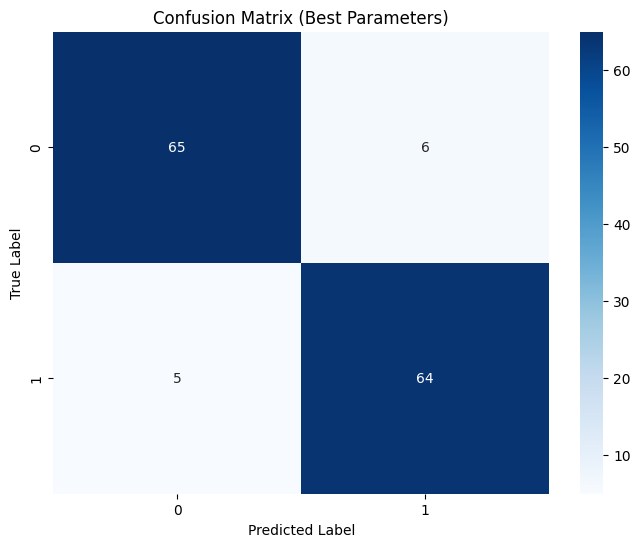

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],  # Jumlah decision tree
    'max_depth': [None, 5, 10],  # Kedalaman maksimum decision tree
    'min_samples_split': [2, 4, 8],  # Jumlah minimum sampel untuk membagi sebuah node
    'min_samples_leaf': [1, 2, 4],  # Jumlah minimum sampel untuk membentuk sebuah daun
    'max_features': ['auto', 'sqrt'],  # Jumlah fitur yang dipertimbangkan
    'bootstrap': [True, False]  # Menggunakan atau tidak menggunakan bootstrap sampling
}

# Perform grid search and train the model with the best parameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
rf_best = RandomForestClassifier(**best_params)
rf_best.fit(X_train, y_train)

# Predict on test set using the best model
rf_pred_best = rf_best.predict(X_test)

# Generate confusion matrix, classification report, and accuracy score
cm_best = confusion_matrix(y_test, rf_pred_best)
cr_best = classification_report(y_test, rf_pred_best)
accuracy_best = accuracy_score(y_test, rf_pred_best)
print("Best Parameters:", best_params)

# Print the classification report and accuracy score
print('Classification Report (Best Parameters):\n', cr_best)
print('Accuracy Score (Best Parameters):', accuracy_best)
print("time to train (Best Parameters): "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict (Best Parameters): "+"{:.2f}".format(end_predict-end_train)+" s")

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm_best, annot=True, cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Best Parameters)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Feature Importance


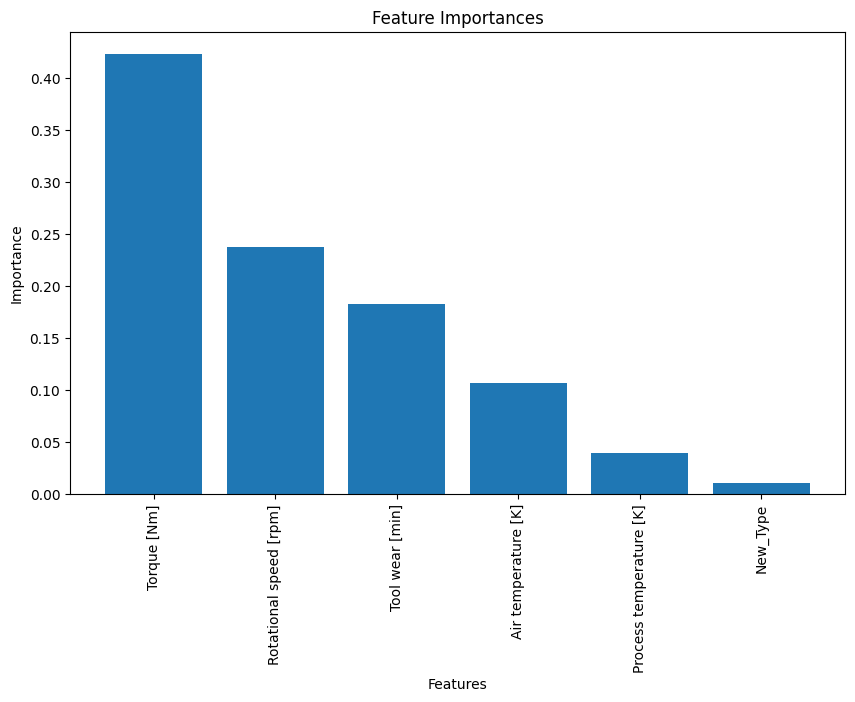

In [ ]:
# Get feature importances
feature_importances = rf.feature_importances_

# Sort feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_feature_importances = feature_importances[sorted_indices]

# Get feature names
feature_names = X_train.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_feature_importances)), sorted_feature_importances)
plt.xticks(range(len(sorted_feature_importances)), feature_names[sorted_indices], rotation=90)
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

## Extreme Gradient Booster

In [ ]:
import re
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
new_df.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in new_df.columns.values]

# Assuming you have a DataFrame called 'data' with your features
# Get the column names as a list
feature_names = new_df.columns.tolist()

# Convert the list of feature names to a single string
feature_names_str = ', '.join(feature_names)

print("Feature names:", feature_names_str)

Feature names: Air temperature _K_, Process temperature _K_, Rotational speed _rpm_, Torque _Nm_, Tool wear _min_, Machine failure, New_Type


In [ ]:
# Splitting data into training and testing set
X1 = new_df.drop('Machine failure', axis=1)
y1 = new_df['Machine failure']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

###Base Model

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.89      0.91        71
           1       0.89      0.93      0.91        69

    accuracy                           0.91       140
   macro avg       0.91      0.91      0.91       140
weighted avg       0.91      0.91      0.91       140

Accuracy Score: 0.9071428571428571
time to train: 0.05 s
time to predict: 0.00 s


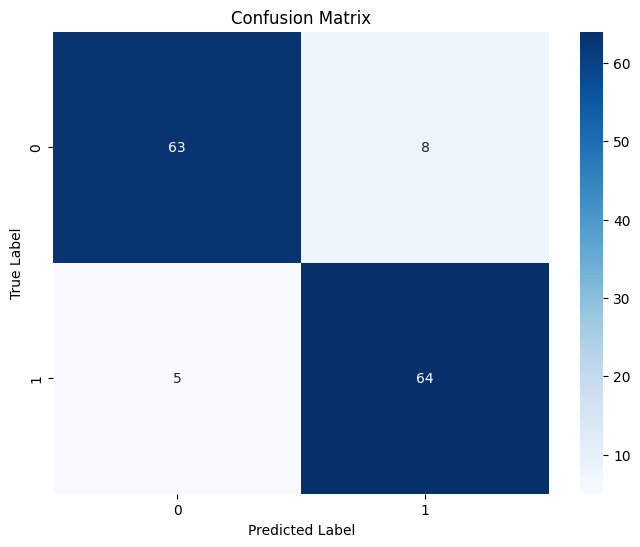

In [ ]:
# Train model
start = time.time()
xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb.fit(X_train1, y_train1)
end_train = time.time()

# Predict on test set
xgb_pred = xgb.predict(X_test1)
end_predict = time.time()

# Generate confusion matrix, classification report, and accuracy score
cm = confusion_matrix(y_test1, xgb_pred)
cr = classification_report(y_test1, xgb_pred)
accuracy = accuracy_score(y_test1, xgb_pred)

print('Classification Report:\n', cr)
print('Accuracy Score:', accuracy)
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

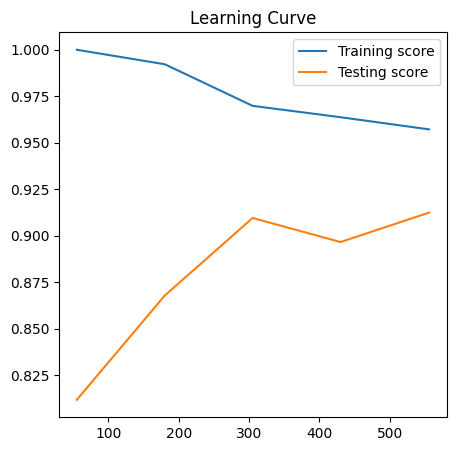

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(xgb, X1, y1, cv=5)

# plot the learning curve
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Testing score')
plt.legend(loc='best')
plt.title('Learning Curve')
plt.show()

###Cross-Validation & Bootstrapping

In [ ]:
# Cross-validation
cross_val_scores_xgb = cross_val_score(xgb, X1, y1, cv=10)
print("Cross-validation scores:", cross_val_scores_xgb)
print("Average cross-validation score:", np.mean(cross_val_scores_xgb))

# Bootstrapping
bootstrap_scores_xgb = []
for i in range(100):
    X_sample, y_sample = resample(X_train1, y_train1, replace=True, n_samples=100, random_state=i)
    xgb.fit(X_sample, y_sample)
    y_pred_xgb = xgb.predict(X_test1)
    score = accuracy_score(y_test1, y_pred_xgb)
    bootstrap_scores_xgb.append(score)

print("Bootstrap scores:", bootstrap_scores_xgb)
print("Average bootstrap score:", np.mean(bootstrap_scores_xgb))

Cross-validation scores: [0.91428571 0.82857143 0.87142857 0.85714286 0.94285714 0.97142857
 0.85507246 0.85507246 0.94202899 0.98550725]
Average cross-validation score: 0.9023395445134577
Bootstrap scores: [0.8214285714285714, 0.8214285714285714, 0.8214285714285714, 0.7642857142857142, 0.8642857142857143, 0.85, 0.7285714285714285, 0.8071428571428572, 0.8071428571428572, 0.8142857142857143, 0.7928571428571428, 0.7928571428571428, 0.8571428571428571, 0.8714285714285714, 0.8428571428571429, 0.8428571428571429, 0.7714285714285715, 0.8214285714285714, 0.8071428571428572, 0.8142857142857143, 0.8428571428571429, 0.8, 0.85, 0.7928571428571428, 0.8428571428571429, 0.8357142857142857, 0.8142857142857143, 0.9, 0.8285714285714286, 0.8, 0.7714285714285715, 0.7928571428571428, 0.7857142857142857, 0.8, 0.8428571428571429, 0.8071428571428572, 0.7714285714285715, 0.8214285714285714, 0.7857142857142857, 0.7928571428571428, 0.8, 0.8071428571428572, 0.8285714285714286, 0.8357142857142857, 0.8571428571428

In [ ]:
# Cross-validation
cross_val_scores_xgb = cross_val_score(xgb, X1, y1, cv=10)
print("Cross-validation scores:", cross_val_scores_xgb)
print("Average cross-validation score:", np.mean(cross_val_scores_xgb))

# Breakdown of classification report for each fold in cross-validation
cv_reports_xgb = []
for fold_idx, score in enumerate(cross_val_scores_xgb):
     fold_report = f"Fold {fold_idx+1} Classification Report:\n"
     fold_report += classification_report(y1, cross_val_predict(xgb, X1, y1, cv=10))
     cv_reports_xgb.append(fold_report)

for fold_report in cv_reports_xgb:
     print(fold_report)

# Bootstrapping
bootstrap_scores_xgb = []
bootstrap_reports_xgb = []
for i in range(100):
     X_sample, y_sample = resample(X_train1, y_train1, replace=True, n_samples=100, random_state=i)
     xgb.fit(X_sample, y_sample)
     y_pred_xgb = xgb.predict(X_test1)
     score = accuracy_score(y_test1, y_pred_xgb)
     bootstrap_scores_xgb.append(score)
     bootstrap_reports_xgb.append(f"Bootstrap {i+1} Classification Report:\n{classification_report(y_test1, y_pred_xgb)}")

print("Bootstrap scores:", bootstrap_scores_xgb)
print("Average bootstrap score:", np.mean(bootstrap_scores_xgb))

for bootstrap_report in bootstrap_reports_xgb:
     print(bootstrap_report)

# Cross-validation
cross_val_scores_xgb = cross_val_score(xgb, X1, y1, cv=10)
print("Cross-validation scores:", cross_val_scores_xgb)
print("Average cross-validation score:", np.mean(cross_val_scores_xgb))

# Calculate average metrics across cross-validation folds
cv_reports_xgb = cross_val_predict(xgb, X1, y1, cv=10, method='predict_proba')
cv_metrics_xgb = classification_report(y1, np.argmax(cv_reports_xgb, axis=1), output_dict=True)
avg_cv_metrics_xgb = {metric: np.mean([cv_metrics_xgb[str(cls)][metric] for cls in cv_metrics_xgb.keys() if cls.isdigit()]) for metric in cv_metrics_xgb['0'].keys()}

print("Average Metrics (Cross-validation):")
for metric, value in avg_cv_metrics_xgb.items():
     print(f"{metric}: {value}")


# Bootstrapping
bootstrap_scores_xgb = []
bootstrap_reports_xgb = []

for i in range(100):
     X_sample, y_sample = resample(X_train1, y_train1, replace=True, n_samples=len(y_test1), random_state=i)
     y_pred_xgb = xgb.predict(X_test1)
     score = accuracy_score(y_test1, y_pred_xgb)
     bootstrap_scores_xgb.append(score)
     bootstrap_reports_xgb.append((X_sample, y_pred_xgb))

print("Bootstrap scores:", bootstrap_scores_xgb)
print("Average bootstrap score:", np.mean(bootstrap_scores_xgb))

 # Calculate average accuracy score
avg_accuracy_xgb = np.mean(bootstrap_scores_xgb)
print("Average Accuracy (Bootstrapping):", avg_accuracy_xgb)

 # Calculate average metrics across bootstrapping iterations
class_metrics_sum = {}
num_classes = 0

for iteration in bootstrap_reports_xgb:
     _, y_pred = iteration
     report = classification_report(y_sample, y_pred, output_dict=True)
     if num_classes == 0:
         for cls in report.keys():
             if cls.isdigit():
                 class_metrics_sum[cls] = {}
                 num_classes += 1
     for cls in class_metrics_sum.keys():
         if cls in report:
             for metric, value in report[cls].items():
                 if metric != 'support':
                     if metric not in class_metrics_sum[cls]:
                         class_metrics_sum[cls][metric] = value
                     else:
                         class_metrics_sum[cls][metric] += value

avg_bootstrap_metrics_xgb = {}
for cls, metrics in class_metrics_sum.items():
     avg_metrics = {metric: value / num_classes for metric, value in metrics.items()}
     avg_bootstrap_metrics_xgb[cls] = avg_metrics

print("Average Metrics (Bootstrapping):")
for cls, metrics in avg_bootstrap_metrics_xgb.items():
     print(f"Class {cls}:")
     for metric, value in metrics.items():
         print(f"{metric}: {value}")

Cross-validation scores: [0.91428571 0.82857143 0.87142857 0.85714286 0.94285714 0.97142857
 0.85507246 0.85507246 0.94202899 0.98550725]
Average cross-validation score: 0.9023395445134577
Fold 1 Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.89      0.90       348
           1       0.89      0.92      0.90       348

    accuracy                           0.90       696
   macro avg       0.90      0.90      0.90       696
weighted avg       0.90      0.90      0.90       696

Fold 2 Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.89      0.90       348
           1       0.89      0.92      0.90       348

    accuracy                           0.90       696
   macro avg       0.90      0.90      0.90       696
weighted avg       0.90      0.90      0.90       696

Fold 3 Classification Report:
              precision    recall  f1-score   support

           0

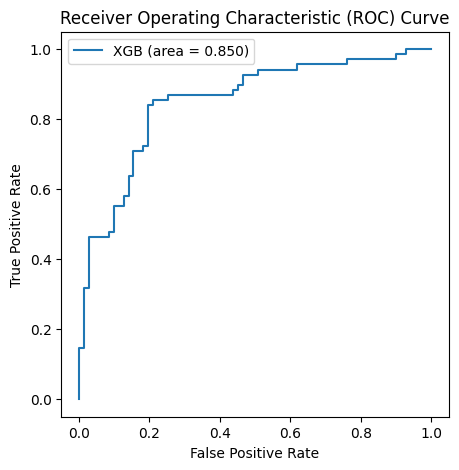

In [ ]:
y_pred_prob_xgb = xgb.predict_proba(X_test1)[:,1]
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test1, y_pred_prob_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.plot(fpr_xgb, tpr_xgb, label='XGB (area = %0.3f)' % roc_auc_xgb)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='best')
plt.show()

###Hyperparameter Tuning

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Classification Report (Best Parameters):
               precision    recall  f1-score   support

           0       0.93      0.89      0.91        71
           1       0.89      0.93      0.91        69

    accuracy                           0.91       140
   macro avg       0.91      0.91      0.91       140
weighted avg       0.91      0.91      0.91       140

Accuracy Score (Best Parameters): 0.9071428571428571
time to train (Best Parameters): 0.10 s
time to predict (Best Parameters): 0.00 s


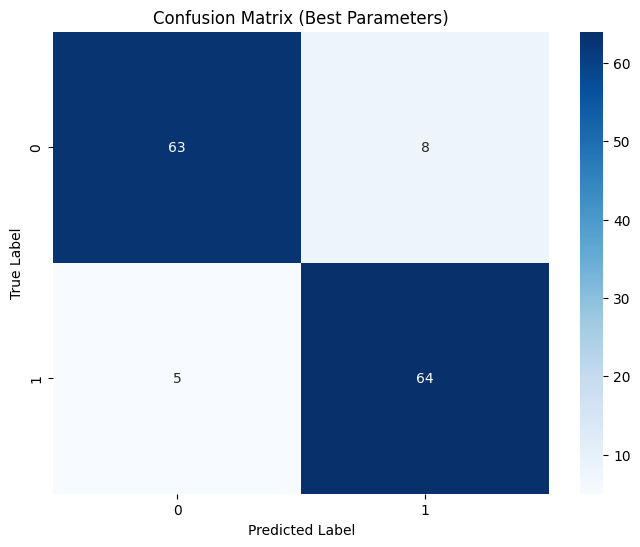

In [ ]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7]
}

# Perform grid search and train the model with the best parameters
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train1, y_train1)
best_params = grid_search.best_params_
xgb_best = XGBClassifier(**best_params)
xgb_best.fit(X_train1, y_train1)

# Predict on test set using the best model
xgb_pred_best = xgb_best.predict(X_test1)

# Generate confusion matrix, classification report, and accuracy score
cm_best = confusion_matrix(y_test1, xgb_pred_best)
cr_best = classification_report(y_test1, xgb_pred_best)
accuracy_best = accuracy_score(y_test1, xgb_pred_best)
print("Best Parameters:", best_params)

# Print the classification report and accuracy score
print('Classification Report (Best Parameters):\n', cr_best)
print('Accuracy Score (Best Parameters):', accuracy_best)
print("time to train (Best Parameters): "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict (Best Parameters): "+"{:.2f}".format(end_predict-end_train)+" s")

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm_best, annot=True, cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Best Parameters)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


### Feature Importance

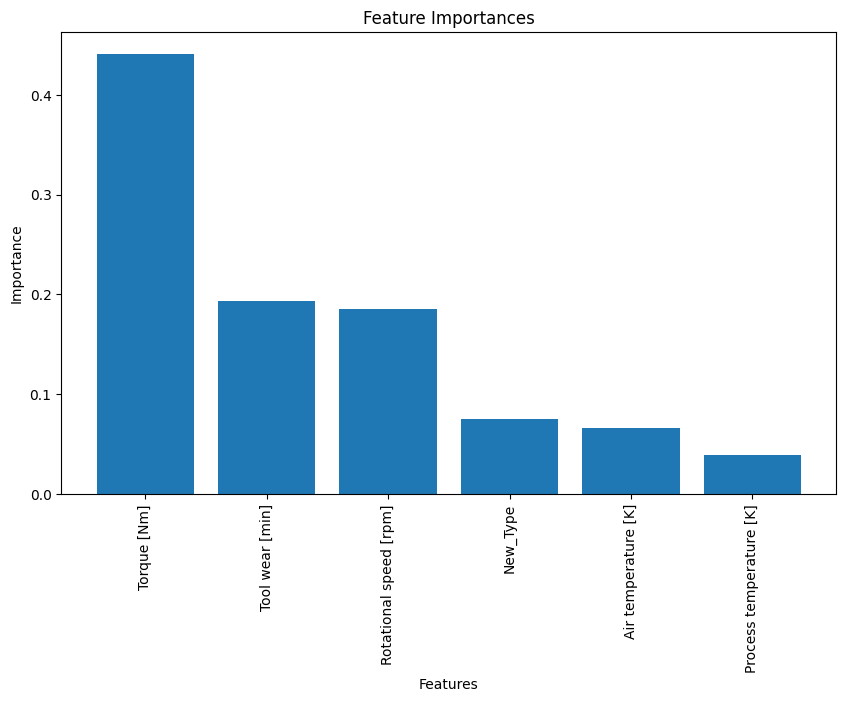

In [ ]:
# Get feature importances
feature_importances = xgb.feature_importances_

# Sort feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_feature_importances = feature_importances[sorted_indices]

# Get feature names
feature_names = X_train.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_feature_importances)), sorted_feature_importances)
plt.xticks(range(len(sorted_feature_importances)), feature_names[sorted_indices], rotation=90)
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

Here are some reasons why these specific hyperparameters are commonly tuned:

n_estimators:

The number of estimators represents the number of decision trees in the ensemble.
Increasing the number of estimators can improve model performance, but it also comes with a cost in terms of computational resources and training time.
By tuning this parameter, we can find an optimal balance between model performance and computational efficiency.
learning_rate:

The learning rate determines the step size at each boosting iteration.
A smaller learning rate can help the model converge to a more accurate solution, but it may require more boosting iterations.
Tuning the learning rate allows us to find an optimal trade-off between model precision and training time.
max_depth:

The maximum depth of a decision tree controls the complexity of the model.
A deeper tree can capture more complex relationships in the data but may also lead to overfitting.
Tuning the max_depth allows us to find the optimal level of complexity for the given dataset, balancing model complexity and generalization ability.
These hyperparameters are often considered essential to tune because they have a significant impact on the model's performance and can help avoid underfitting or overfitting. However, the choice of hyperparameters to tune can vary depending on the specific problem, dataset, and algorithm being used.

## Support Vector Machine

###Base Model

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.86      0.88        71
           1       0.86      0.91      0.89        69

    accuracy                           0.89       140
   macro avg       0.89      0.89      0.89       140
weighted avg       0.89      0.89      0.89       140

Accuracy Score: 0.8857142857142857
time to train: 0.03 s
time to predict: 0.00 s


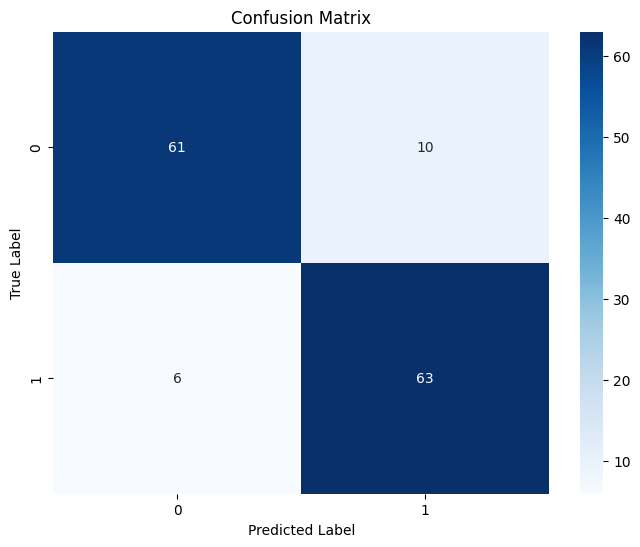

In [ ]:
# Train model
start = time.time()
svm = SVC(kernel='rbf', C=2, probability=True)
svm.fit(X_train, y_train)
end_train = time.time()

# Predict on test set
svm_pred = svm.predict(X_test)
end_predict = time.time()

# Generate confusion matrix, classification report, and accuracy score
cm = confusion_matrix(y_test, svm_pred)
cr = classification_report(y_test, svm_pred)
accuracy = accuracy_score(y_test, svm_pred)

print('Classification Report:\n', cr)
print('Accuracy Score:', accuracy)
print("time to train: " + "{:.2f}".format(end_train - start) + " s")
print("time to predict: " + "{:.2f}".format(end_predict - end_train) + " s")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

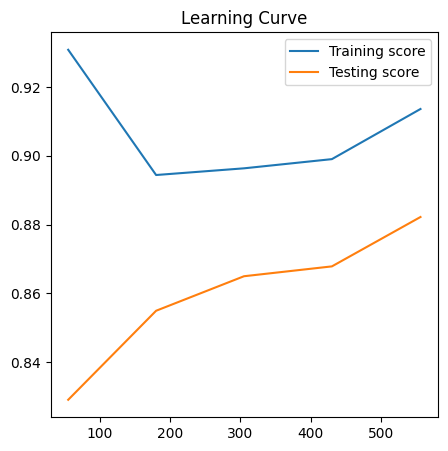

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(svm, X1, y1, cv=5)

# plot the learning curve
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Testing score')
plt.legend(loc='best')
plt.title('Learning Curve')
plt.show()

###Cross-Validation & Bootstrapping

In [ ]:
cross_val_scores_svm = cross_val_score(svm, X1, y1, cv=10)
print("Cross-validation scores:", cross_val_scores_svm)
print("Average cross-validation score:", np.mean(cross_val_scores_svm))

bootstrap_scores_svm = []
for i in range(100):
    X_sample, y_sample = resample(X_train, y_train, replace=True, n_samples=100, random_state=i)
    svm.fit(X_sample, y_sample)
    y_pred_svm = svm.predict(X_test)
    score = accuracy_score(y_test, y_pred_svm)
    bootstrap_scores_svm.append(score)

print("Bootstrap scores:", bootstrap_scores_svm)
print("Average bootstrap score:", np.mean(bootstrap_scores_svm))

Cross-validation scores: [0.9        0.81428571 0.84285714 0.85714286 0.92857143 0.92857143
 0.85507246 0.84057971 0.94202899 0.94202899]
Average cross-validation score: 0.8851138716356107
Bootstrap scores: [0.85, 0.8357142857142857, 0.8285714285714286, 0.8714285714285714, 0.8571428571428571, 0.8428571428571429, 0.8571428571428571, 0.8785714285714286, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8428571428571429, 0.8642857142857143, 0.8642857142857143, 0.85, 0.8357142857142857, 0.8285714285714286, 0.85, 0.8714285714285714, 0.8285714285714286, 0.85, 0.8428571428571429, 0.8714285714285714, 0.8571428571428571, 0.8428571428571429, 0.8571428571428571, 0.8428571428571429, 0.85, 0.8571428571428571, 0.8571428571428571, 0.8214285714285714, 0.8428571428571429, 0.8, 0.85, 0.85, 0.7928571428571428, 0.8214285714285714, 0.8142857142857143, 0.8214285714285714, 0.8785714285714286, 0.8142857142857143, 0.8357142857142857, 0.8285714285714286, 0.8285714285714286, 0.8428571428571429, 0.835

In [ ]:
# Cross-validation
cross_val_scores_svm = cross_val_score(svm, X1, y1, cv=10)
print("Cross-validation scores:", cross_val_scores_svm)
print("Average cross-validation score:", np.mean(cross_val_scores_svm))

# Breakdown of classification report for each fold in cross-validation
cv_reports_svm = []
for fold_idx, score in enumerate(cross_val_scores_svm):
    fold_report = f"Fold {fold_idx+1} Classification Report:\n"
    fold_report += classification_report(y1, cross_val_predict(svm, X1, y1, cv=10))
    cv_reports_svm.append(fold_report)

for fold_report in cv_reports_svm:
    print(fold_report)

# Bootstrapping
bootstrap_scores_svm = []
bootstrap_reports_svm = []
for i in range(100):
    X_sample, y_sample = resample(X_train, y_train, replace=True, n_samples=100, random_state=i)
    svm.fit(X_sample, y_sample)
    y_pred_svm = svm.predict(X_test)
    score = accuracy_score(y_test, y_pred_svm)
    bootstrap_scores_svm.append(score)
    bootstrap_reports_svm.append(f"Bootstrap {i+1} Classification Report:\n{classification_report(y_test, y_pred_svm)}")

print("Bootstrap scores:", bootstrap_scores_svm)
print("Average bootstrap score:", np.mean(bootstrap_scores_svm))

for bootstrap_report in bootstrap_reports_svm:
    print(bootstrap_report)

# Cross-validation
cross_val_scores_svm = cross_val_score(svm, X1, y1, cv=10)
print("Cross-validation scores:", cross_val_scores_svm)
print("Average cross-validation score:", np.mean(cross_val_scores_svm))

# Calculate average metrics across cross-validation folds
cv_reports_svm = cross_val_predict(svm, X1, y1, cv=10, method='predict_proba')
cv_metrics_svm = classification_report(y1, np.argmax(cv_reports_svm, axis=1), output_dict=True)
avg_cv_metrics_svm = {metric: np.mean([cv_metrics_svm[str(cls)][metric] for cls in cv_metrics_svm.keys() if cls.isdigit()]) for metric in cv_metrics_svm['0'].keys()}

print("Average Metrics (Cross-validation):")
for metric, value in avg_cv_metrics_svm.items():
    print(f"{metric}: {value}")


# Bootstrapping
bootstrap_scores_svm = []
bootstrap_reports_svm = []

for i in range(100):
    X_sample, y_sample = resample(X_train, y_train, replace=True, n_samples=len(y_test), random_state=i)
    y_pred_svm = svm.predict(X_test)
    score = accuracy_score(y_test, y_pred_svm)
    bootstrap_scores_svm.append(score)
    bootstrap_reports_svm.append((X_sample, y_pred_svm))

print("Bootstrap scores:", bootstrap_scores_svm)
print("Average bootstrap score:", np.mean(bootstrap_scores_svm))

# Calculate average accuracy score
avg_accuracy_svm = np.mean(bootstrap_scores_svm)
print("Average Accuracy (Bootstrapping):", avg_accuracy_svm)

# Calculate average metrics across bootstrapping iterations
class_metrics_sum = {}
num_classes = 0

for iteration in bootstrap_reports_svm:
    _, y_pred = iteration
    report = classification_report(y_sample, y_pred, output_dict=True)
    if num_classes == 0:
        for cls in report.keys():
            if cls.isdigit():
                class_metrics_sum[cls] = {}
                num_classes += 1
    for cls in class_metrics_sum.keys():
        if cls in report:
            for metric, value in report[cls].items():
                if metric != 'support':
                    if metric not in class_metrics_sum[cls]:
                        class_metrics_sum[cls][metric] = value
                    else:
                        class_metrics_sum[cls][metric] += value

avg_bootstrap_metrics_svm = {}
for cls, metrics in class_metrics_sum.items():
    avg_metrics = {metric: value / num_classes for metric, value in metrics.items()}
    avg_bootstrap_metrics_svm[cls] = avg_metrics

print("Average Metrics (Bootstrapping):")
for cls, metrics in avg_bootstrap_metrics_svm.items():
    print(f"Class {cls}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")

Cross-validation scores: [0.9        0.81428571 0.84285714 0.85714286 0.92857143 0.92857143
 0.85507246 0.84057971 0.94202899 0.94202899]
Average cross-validation score: 0.8851138716356107
Fold 1 Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.87      0.88       348
           1       0.87      0.90      0.89       348

    accuracy                           0.89       696
   macro avg       0.89      0.89      0.89       696
weighted avg       0.89      0.89      0.89       696

Fold 2 Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.87      0.88       348
           1       0.87      0.90      0.89       348

    accuracy                           0.89       696
   macro avg       0.89      0.89      0.89       696
weighted avg       0.89      0.89      0.89       696

Fold 3 Classification Report:
              precision    recall  f1-score   support

           0

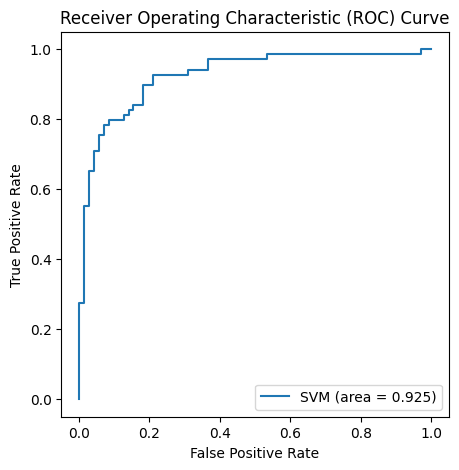

In [ ]:
y_pred_prob_svm = svm.predict_proba(X_test)[:,1]
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_pred_prob_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

plt.plot(fpr_svm, tpr_svm, label='SVM (area = %0.3f)' % roc_auc_svm)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='best')
plt.show()

###Hyperparameter Tuning

Best Parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Classification Report (Best Parameters):
               precision    recall  f1-score   support

           0       0.91      0.83      0.87        71
           1       0.84      0.91      0.87        69

    accuracy                           0.87       140
   macro avg       0.87      0.87      0.87       140
weighted avg       0.87      0.87      0.87       140

Accuracy Score (Best Parameters): 0.9071428571428571


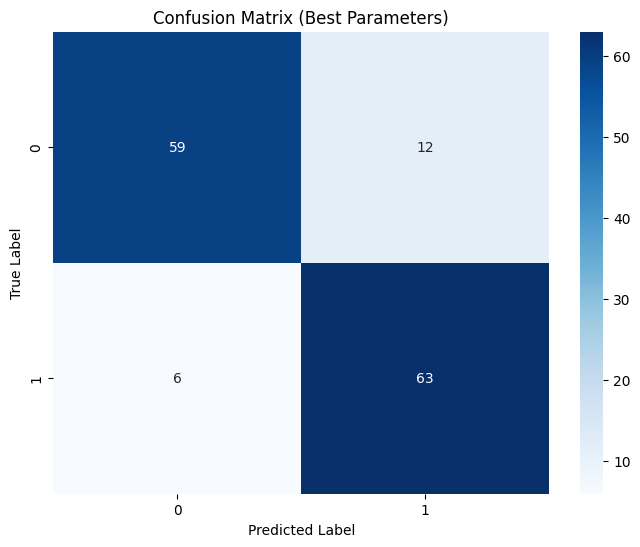

In [ ]:
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.1, 0.01, 0.001]
}

grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
svm_best = SVC(**best_params, probability=True)
svm_best.fit(X_train, y_train)

svm_pred_best = svm_best.predict(X_test)
cm_best = confusion_matrix(y_test, svm_pred_best)
cr_best = classification_report(y_test, svm_pred_best)
print("Best Parameters:", best_params)

print('Classification Report (Best Parameters):\n', cr_best)
print('Accuracy Score (Best Parameters):', accuracy_best)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_best, annot=True, cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Best Parameters)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Modelling Dengan Feature Selection (FS)

## Random Forest (FS)

In [ ]:
# Splitting data into training and testing set
X1 = new_df1.drop('Machine failure', axis=1)
y1 = new_df1['Machine failure']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

### Base Model (FS)

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.86      0.89        71
           1       0.86      0.93      0.90        69

    accuracy                           0.89       140
   macro avg       0.89      0.89      0.89       140
weighted avg       0.89      0.89      0.89       140

Accuracy Score: 0.8928571428571429
time to train: 0.17 s
time to predict: 0.01 s


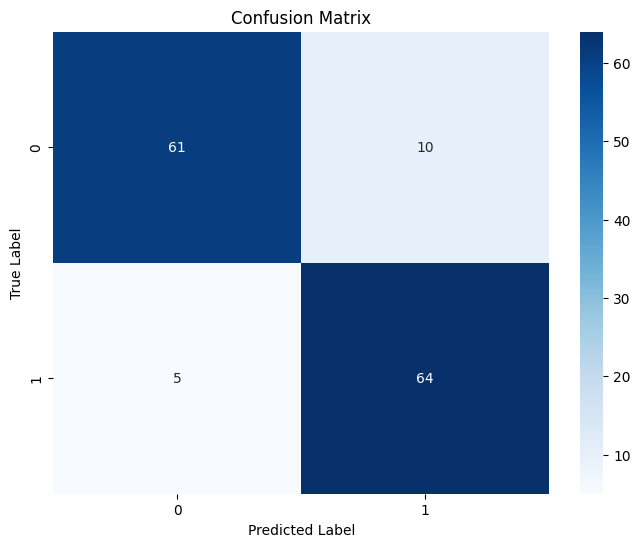

In [ ]:
# Train model
start = time.time()
rf1 = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
rf1.fit(X_train1, y_train1)
end_train = time.time()

# Predict on test set
rf1_pred = rf1.predict(X_test1)
end_predict = time.time()

# Generate confusion matrix, classification report, and accuracy score
cm = confusion_matrix(y_test1, rf1_pred)
cr = classification_report(y_test1, rf1_pred)
accuracy = accuracy_score(y_test1, rf1_pred)

print('Classification Report:\n', cr)
print('Accuracy Score:', accuracy)
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

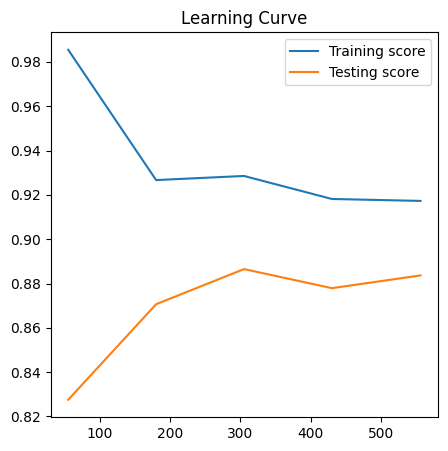

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(rf1, X1, y1, cv=5)

# plot the learning curve
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Testing score')
plt.legend(loc='best')
plt.title('Learning Curve')
plt.show()

### Cross-Validation & Bootstrapping (FS)

In [ ]:
cross_val_scores_rf1 = cross_val_score(rf1, X1, y1, cv=10)
print("Cross-validation scores:", cross_val_scores_rf1)
print("Average cross-validation score:", np.mean(cross_val_scores_rf1))

bootstrap_scores_rf1 = []
for i in range(100):
    X_sample, y_sample = resample(X_train1, y_train1, replace=True, n_samples=100, random_state=42)
    rf1.fit(X_sample, y_sample)
    y_pred_rf1 = rf1.predict(X_test1)
    score = accuracy_score(y_test1, y_pred_rf1)
    bootstrap_scores_rf1.append(score)

print("Bootstrap scores:", bootstrap_scores_rf1)
print("Average bootstrap score:", np.mean(bootstrap_scores_rf1))

Cross-validation scores: [0.9        0.8        0.88571429 0.84285714 0.91428571 0.95714286
 0.86956522 0.86956522 0.91304348 0.97101449]
Average cross-validation score: 0.8923188405797102
Bootstrap scores: [0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571

In [ ]:
# Cross-validation
cross_val_scores_rf1 = cross_val_score(rf1, X1, y1, cv=10)
print("Cross-validation scores:", cross_val_scores_rf1)
print("Average cross-validation score:", np.mean(cross_val_scores_rf1))

# Breakdown of classification report for each fold in cross-validation
cv_reports_rf1 = []
for fold_idx, score in enumerate(cross_val_scores_rf1):
    fold_report = f"Fold {fold_idx+1} Classification Report:\n"
    fold_report += classification_report(y1, cross_val_predict(rf1, X1, y1, cv=10))
    cv_reports_rf1.append(fold_report)

for fold_report in cv_reports_rf1:
    print(fold_report)

# Bootstrapping
bootstrap_scores_rf1 = []
bootstrap_reports_rf1 = []
for i in range(100):
    X_sample, y_sample = resample(X_train1, y_train1, replace=True, n_samples=100, random_state=i)
    rf1.fit(X_sample, y_sample)
    y_pred_rf1 = rf1.predict(X_test1)
    score = accuracy_score(y_test1, y_pred_rf1)
    bootstrap_scores_rf1.append(score)
    bootstrap_reports_rf1.append(f"Bootstrap {i+1} Classification Report:\n{classification_report(y_test1, y_pred_rf1)}")

print("Bootstrap scores:", bootstrap_scores_rf1)
print("Average bootstrap score:", np.mean(bootstrap_scores_rf1))

for bootstrap_report in bootstrap_reports_rf1:
    print(bootstrap_report)

# Cross-validation
cross_val_scores_rf1 = cross_val_score(rf1, X1, y1, cv=10)
print("Cross-validation scores:", cross_val_scores_rf1)
print("Average cross-validation score:", np.mean(cross_val_scores_rf1))

# Calculate average metrics across cross-validation folds
cv_reports_rf1 = cross_val_predict(rf1, X1, y1, cv=10, method='predict_proba')
cv_metrics_rf1 = classification_report(y1, np.argmax(cv_reports_rf1, axis=1), output_dict=True)
avg_cv_metrics_rf1 = {metric: np.mean([cv_metrics_rf1[str(cls)][metric] for cls in cv_metrics_rf1.keys() if cls.isdigit()]) for metric in cv_metrics_rf1['0'].keys()}

print("Average Metrics (Cross-validation):")
for metric, value in avg_cv_metrics_rf1.items():
    print(f"{metric}: {value}")


# Bootstrapping
bootstrap_scores_rf1 = []
bootstrap_reports_rf1 = []

for i in range(100):
    X_sample, y_sample = resample(X_train1, y_train1, replace=True, n_samples=len(y_test1), random_state=i)
    y_pred_rf1 = rf1.predict(X_test1)
    score = accuracy_score(y_test1, y_pred_rf1)
    bootstrap_scores_rf1.append(score)
    bootstrap_reports_rf1.append((X_sample, y_pred_rf1))

print("Bootstrap scores:", bootstrap_scores_rf1)
print("Average bootstrap score:", np.mean(bootstrap_scores_rf1))

# Calculate average accuracy score
avg_accuracy_rf1 = np.mean(bootstrap_scores_rf1)
print("Average Accuracy (Bootstrapping):", avg_accuracy_rf1)

# Calculate average metrics across bootstrapping iterations
class_metrics_sum = {}
num_classes = 0

for iteration in bootstrap_reports_rf1:
    _, y_pred = iteration
    report = classification_report(y_sample, y_pred, output_dict=True)
    if num_classes == 0:
        for cls in report.keys():
            if cls.isdigit():
                class_metrics_sum[cls] = {}
                num_classes += 1
    for cls in class_metrics_sum.keys():
        if cls in report:
            for metric, value in report[cls].items():
                if metric != 'support':
                    if metric not in class_metrics_sum[cls]:
                        class_metrics_sum[cls][metric] = value
                    else:
                        class_metrics_sum[cls][metric] += value

avg_bootstrap_metrics_rf1 = {}
for cls, metrics in class_metrics_sum.items():
    avg_metrics = {metric: value / num_classes for metric, value in metrics.items()}
    avg_bootstrap_metrics_rf1[cls] = avg_metrics

print("Average Metrics (Bootstrapping):")
for cls, metrics in avg_bootstrap_metrics_rf1.items():
    print(f"Class {cls}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")

Cross-validation scores: [0.9        0.8        0.88571429 0.84285714 0.91428571 0.95714286
 0.86956522 0.86956522 0.91304348 0.97101449]
Average cross-validation score: 0.8923188405797102
Fold 1 Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       348
           1       0.87      0.93      0.90       348

    accuracy                           0.89       696
   macro avg       0.89      0.89      0.89       696
weighted avg       0.89      0.89      0.89       696

Fold 2 Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       348
           1       0.87      0.93      0.90       348

    accuracy                           0.89       696
   macro avg       0.89      0.89      0.89       696
weighted avg       0.89      0.89      0.89       696

Fold 3 Classification Report:
              precision    recall  f1-score   support

           0

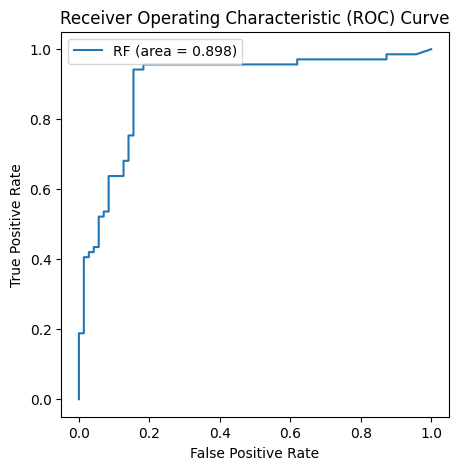

In [ ]:
y_pred_prob_rf = rf1.predict_proba(X_test1)[:,1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test1, y_pred_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.plot(fpr_rf, tpr_rf, label='RF (area = %0.3f)' % roc_auc_rf)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='best')
plt.show()

### Hyperparameter Tuning (FS)

Best Parameters: {'max_depth': 7, 'n_estimators': 200}
Classification Report (Best Parameters):
               precision    recall  f1-score   support

           0       0.93      0.89      0.91        71
           1       0.89      0.93      0.91        69

    accuracy                           0.91       140
   macro avg       0.91      0.91      0.91       140
weighted avg       0.91      0.91      0.91       140

Accuracy Score (Best Parameters): 0.9071428571428571


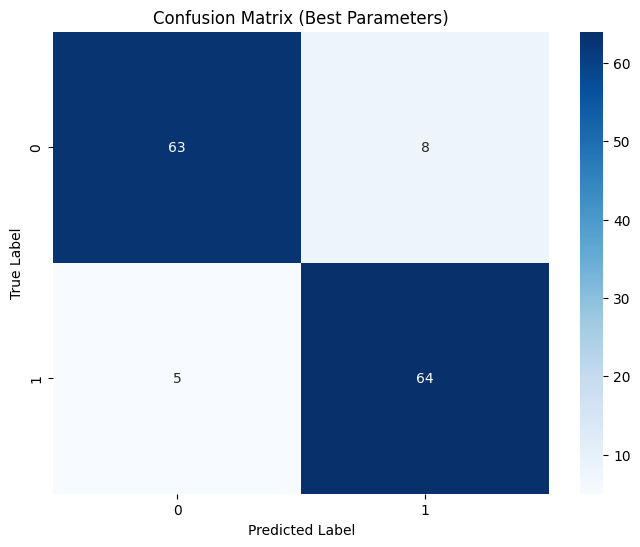

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train1, y_train1)
best_params = grid_search.best_params_
rf_best = RandomForestClassifier(**best_params)
rf_best.fit(X_train1, y_train1)

rf1_pred_best = rf_best.predict(X_test1)

cm_best = confusion_matrix(y_test1, rf1_pred_best)
cr_best = classification_report(y_test1, rf1_pred_best)

print("Best Parameters:", best_params)
print('Classification Report (Best Parameters):\n', cr_best)
print('Accuracy Score (Best Parameters):', accuracy_best)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_best, annot=True, cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Best Parameters)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Feature Importance

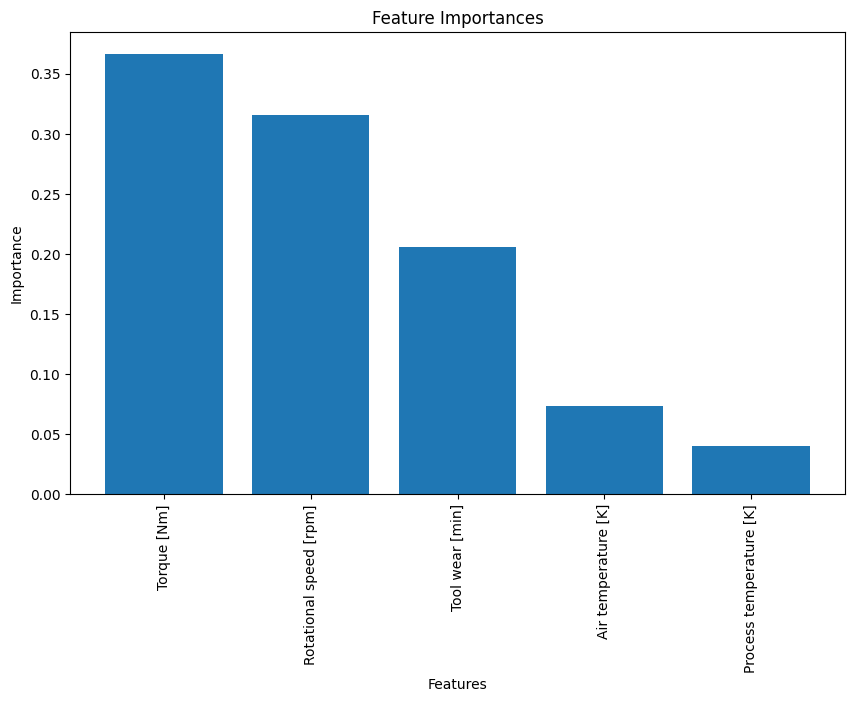

In [ ]:
# Get feature importances
feature_importances = rf1.feature_importances_

# Sort feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_feature_importances = feature_importances[sorted_indices]

# Get feature names
feature_names = X_train.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_feature_importances)), sorted_feature_importances)
plt.xticks(range(len(sorted_feature_importances)), feature_names[sorted_indices], rotation=90)
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

## Extreme Gradient Booster (FS)

In [ ]:
import re
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
new_df1.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in new_df1.columns.values]

# Assuming you have a DataFrame called 'data' with your features
# Get the column names as a list
feature_names = new_df1.columns.tolist()

# Convert the list of feature names to a single string
feature_names_str = ', '.join(feature_names)

print("Feature names:", feature_names_str)

Feature names: Air temperature _K_, Process temperature _K_, Rotational speed _rpm_, Torque _Nm_, Tool wear _min_, Machine failure


In [ ]:
# Splitting data into training and testing set
X1 = new_df1.drop('Machine failure', axis=1)
y1 = new_df1['Machine failure']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

### Base Model (FS)

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.90      0.91        71
           1       0.90      0.93      0.91        69

    accuracy                           0.91       140
   macro avg       0.91      0.91      0.91       140
weighted avg       0.91      0.91      0.91       140

Accuracy Score: 0.9142857142857143
time to train: 0.41 s
time to predict: 0.00 s


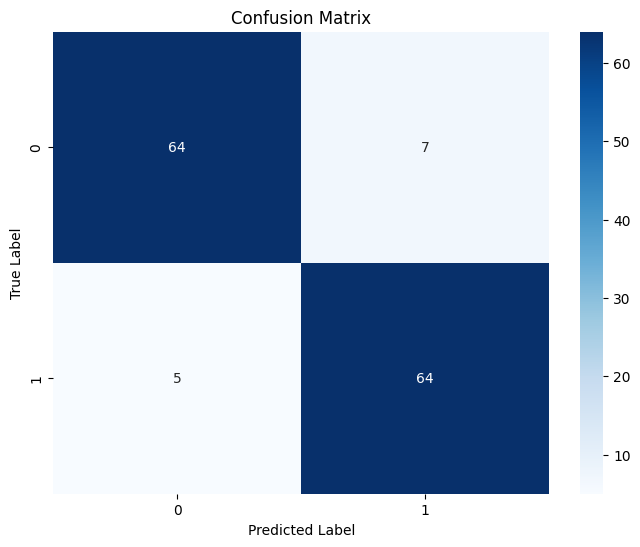

In [ ]:
# Train model
start = time.time()
xgb1 = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb1.fit(X_train1, y_train1)
end_train = time.time()

# Predict on test set
xgb1_pred = xgb1.predict(X_test1)
end_predict = time.time()

# Generate confusion matrix, classification report, and accuracy score
cm = confusion_matrix(y_test1, xgb1_pred)
cr = classification_report(y_test1, xgb1_pred)
accuracy = accuracy_score(y_test1, xgb1_pred)

print('Classification Report:\n', cr)
print('Accuracy Score:', accuracy)
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

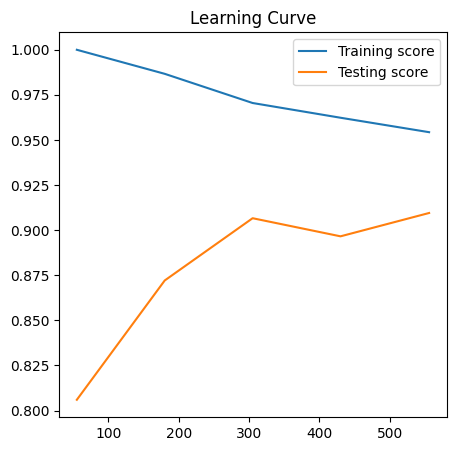

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(xgb1, X1, y1, cv=5)

# plot the learning curve
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Testing score')
plt.legend(loc='best')
plt.title('Learning Curve')
plt.show()

### Cross-Validation & Bootstrapping (FS)

In [ ]:
cross_val_scores_xgb1 = cross_val_score(xgb1, X1, y1, cv=10)
print("Cross-validation scores:", cross_val_scores_xgb1)
print("Average cross-validation score:", np.mean(cross_val_scores_xgb1))

bootstrap_scores_xgb1 = []
for i in range(100):
    X_sample, y_sample = resample(X_train1, y_train1, replace=True, n_samples=100, random_state=i)
    xgb1.fit(X_sample, y_sample)
    y_pred_xgb1 = xgb1.predict(X_test1)
    score = accuracy_score(y_test1, y_pred_xgb1)
    bootstrap_scores_xgb1.append(score)

print("Bootstrap scores:", bootstrap_scores_xgb1)
print("Average bootstrap score:", np.mean(bootstrap_scores_xgb1))

Cross-validation scores: [0.91428571 0.82857143 0.88571429 0.85714286 0.94285714 0.98571429
 0.86956522 0.85507246 0.91304348 0.98550725]
Average cross-validation score: 0.9037474120082816
Bootstrap scores: [0.8285714285714286, 0.8214285714285714, 0.8214285714285714, 0.7428571428571429, 0.8785714285714286, 0.8571428571428571, 0.7428571428571429, 0.7857142857142857, 0.8071428571428572, 0.8142857142857143, 0.8071428571428572, 0.8142857142857143, 0.8571428571428571, 0.8785714285714286, 0.8571428571428571, 0.8428571428571429, 0.7928571428571428, 0.8071428571428572, 0.8071428571428572, 0.8071428571428572, 0.8285714285714286, 0.8142857142857143, 0.8714285714285714, 0.7928571428571428, 0.85, 0.8357142857142857, 0.8142857142857143, 0.9, 0.8285714285714286, 0.8071428571428572, 0.7714285714285715, 0.7928571428571428, 0.7928571428571428, 0.8, 0.8571428571428571, 0.7857142857142857, 0.7785714285714286, 0.8214285714285714, 0.7928571428571428, 0.7857142857142857, 0.8, 0.8, 0.8285714285714286, 0.8357

In [ ]:
# Cross-validation
cross_val_scores_xgb1 = cross_val_score(xgb1, X1, y1, cv=10)
print("Cross-validation scores:", cross_val_scores_xgb1)
print("Average cross-validation score:", np.mean(cross_val_scores_xgb1))

# Breakdown of classification report for each fold in cross-validation
cv_reports_xgb1 = []
for fold_idx, score in enumerate(cross_val_scores_xgb1):
     fold_report = f"Fold {fold_idx+1} Classification Report:\n"
     fold_report += classification_report(y1, cross_val_predict(xgb1, X1, y1, cv=10))
     cv_reports_xgb1.append(fold_report)

for fold_report in cv_reports_xgb1:
     print(fold_report)

# Bootstrapping
bootstrap_scores_xgb1 = []
bootstrap_reports_xgb1 = []
for i in range(100):
     X_sample, y_sample = resample(X_train1, y_train1, replace=True, n_samples=100, random_state=i)
     xgb1.fit(X_sample, y_sample)
     y_pred_xgb1 = xgb1.predict(X_test1)
     score = accuracy_score(y_test1, y_pred_xgb1)
     bootstrap_scores_xgb1.append(score)
     bootstrap_reports_xgb1.append(f"Bootstrap {i+1} Classification Report:\n{classification_report(y_test1, y_pred_xgb1)}")

print("Bootstrap scores:", bootstrap_scores_xgb1)
print("Average bootstrap score:", np.mean(bootstrap_scores_xgb1))

for bootstrap_report in bootstrap_reports_xgb1:
     print(bootstrap_report)

# Cross-validation
cross_val_scores_xgb1 = cross_val_score(xgb1, X1, y1, cv=10)
print("Cross-validation scores:", cross_val_scores_xgb1)
print("Average cross-validation score:", np.mean(cross_val_scores_xgb1))

# Calculate average metrics across cross-validation folds
cv_reports_xgb1 = cross_val_predict(xgb1, X1, y1, cv=10, method='predict_proba')
cv_metrics_xgb1 = classification_report(y1, np.argmax(cv_reports_xgb1, axis=1), output_dict=True)
avg_cv_metrics_xgb1 = {metric: np.mean([cv_metrics_xgb1[str(cls)][metric] for cls in cv_metrics_xgb1.keys() if cls.isdigit()]) for metric in cv_metrics_xgb1['0'].keys()}

print("Average Metrics (Cross-validation):")
for metric, value in avg_cv_metrics_xgb1.items():
     print(f"{metric}: {value}")


# Bootstrapping
bootstrap_scores_xgb1 = []
bootstrap_reports_xgb1 = []

for i in range(100):
     X_sample, y_sample = resample(X_train1, y_train1, replace=True, n_samples=len(y_test1), random_state=i)
     y_pred_xgb1 = xgb1.predict(X_test1)
     score = accuracy_score(y_test1, y_pred_xgb1)
     bootstrap_scores_xgb1.append(score)
     bootstrap_reports_xgb1.append((X_sample, y_pred_xgb1))

print("Bootstrap scores:", bootstrap_scores_xgb1)
print("Average bootstrap score:", np.mean(bootstrap_scores_xgb1))

 # Calculate average accuracy score
avg_accuracy_xgb1 = np.mean(bootstrap_scores_xgb1)
print("Average Accuracy (Bootstrapping):", avg_accuracy_xgb1)

 # Calculate average metrics across bootstrapping iterations
class_metrics_sum = {}
num_classes = 0

for iteration in bootstrap_reports_xgb1:
     _, y_pred = iteration
     report = classification_report(y_sample, y_pred, output_dict=True)
     if num_classes == 0:
         for cls in report.keys():
             if cls.isdigit():
                 class_metrics_sum[cls] = {}
                 num_classes += 1
     for cls in class_metrics_sum.keys():
         if cls in report:
             for metric, value in report[cls].items():
                 if metric != 'support':
                     if metric not in class_metrics_sum[cls]:
                         class_metrics_sum[cls][metric] = value
                     else:
                         class_metrics_sum[cls][metric] += value

avg_bootstrap_metrics_xgb1 = {}
for cls, metrics in class_metrics_sum.items():
     avg_metrics = {metric: value / num_classes for metric, value in metrics.items()}
     avg_bootstrap_metrics_xgb1[cls] = avg_metrics

print("Average Metrics (Bootstrapping):")
for cls, metrics in avg_bootstrap_metrics_xgb1.items():
     print(f"Class {cls}:")
     for metric, value in metrics.items():
         print(f"{metric}: {value}")

Cross-validation scores: [0.91428571 0.82857143 0.88571429 0.85714286 0.94285714 0.98571429
 0.86956522 0.85507246 0.91304348 0.98550725]
Average cross-validation score: 0.9037474120082816
Fold 1 Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       348
           1       0.89      0.93      0.91       348

    accuracy                           0.90       696
   macro avg       0.90      0.90      0.90       696
weighted avg       0.90      0.90      0.90       696

Fold 2 Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       348
           1       0.89      0.93      0.91       348

    accuracy                           0.90       696
   macro avg       0.90      0.90      0.90       696
weighted avg       0.90      0.90      0.90       696

Fold 3 Classification Report:
              precision    recall  f1-score   support

           0

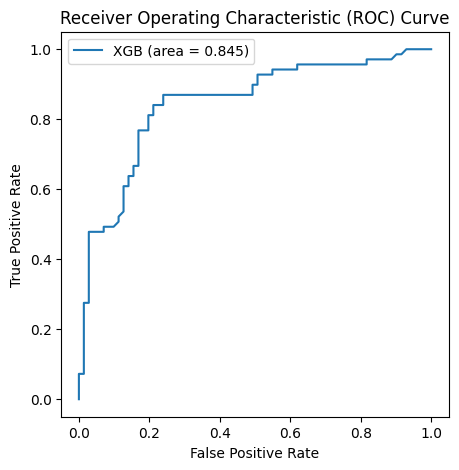

In [ ]:
y_pred_prob_xgb = xgb1.predict_proba(X_test1)[:,1]
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test1, y_pred_prob_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.plot(fpr_xgb, tpr_xgb, label='XGB (area = %0.3f)' % roc_auc_xgb)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='best')
plt.show()

### Hyperparameter Tuning (FS)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Classification Report (Best Parameters):
               precision    recall  f1-score   support

           0       0.93      0.90      0.91        71
           1       0.90      0.93      0.91        69

    accuracy                           0.91       140
   macro avg       0.91      0.91      0.91       140
weighted avg       0.91      0.91      0.91       140

Accuracy Score (Best Parameters): 0.9142857142857143


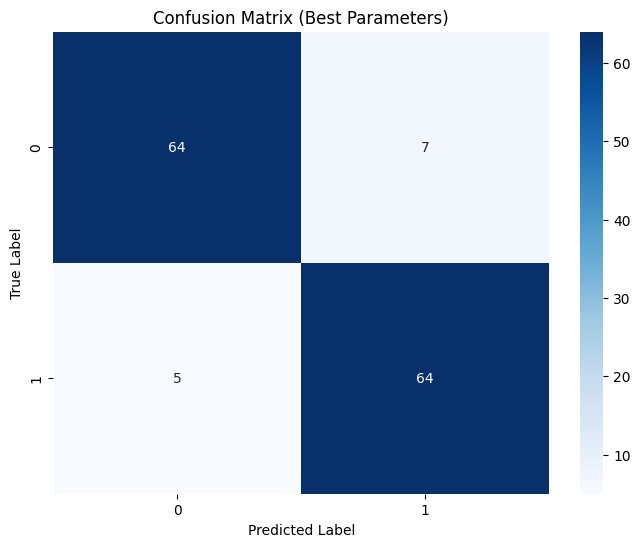

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train1, y_train1)
best_params = grid_search.best_params_
xgb_best = XGBClassifier(**best_params)
xgb_best.fit(X_train1, y_train1)

xgb1_pred_best = xgb_best.predict(X_test1)

cm_best = confusion_matrix(y_test1, xgb1_pred_best)
cr_best = classification_report(y_test1, xgb1_pred_best)
accuracy_best = accuracy_score(y_test1, xgb1_pred_best)
print("Best Parameters:", best_params)

print('Classification Report (Best Parameters):\n', cr_best)
print('Accuracy Score (Best Parameters):', accuracy_best)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_best, annot=True, cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Best Parameters)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


### Feature Importance

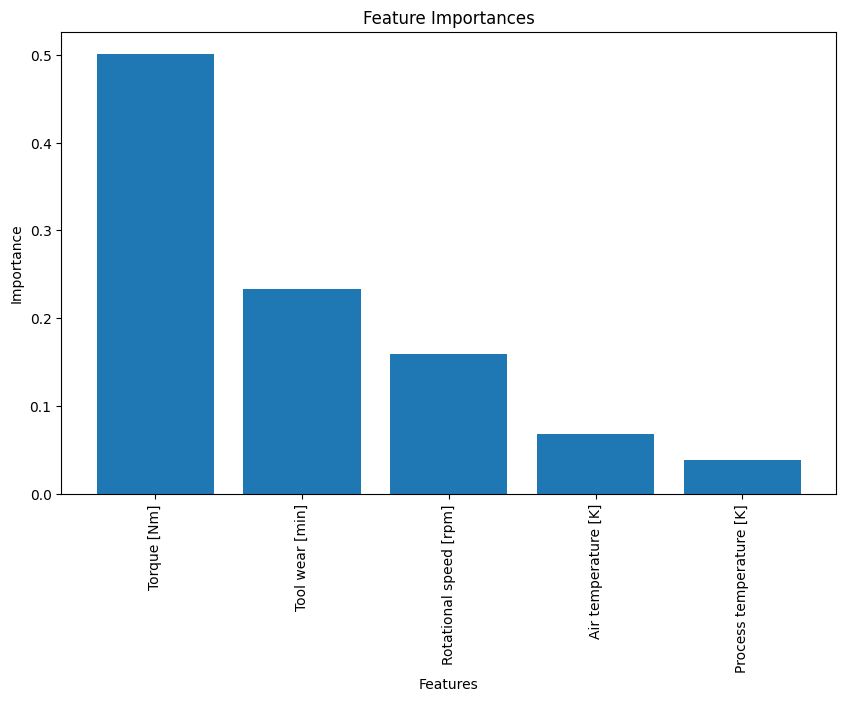

In [ ]:
# Get feature importances
feature_importances = xgb1.feature_importances_

# Sort feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_feature_importances = feature_importances[sorted_indices]

# Get feature names
feature_names = X_train.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_feature_importances)), sorted_feature_importances)
plt.xticks(range(len(sorted_feature_importances)), feature_names[sorted_indices], rotation=90)
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

## Support Vector Machine

###Base Model (FS)

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.86      0.88        71
           1       0.86      0.91      0.89        69

    accuracy                           0.89       140
   macro avg       0.89      0.89      0.89       140
weighted avg       0.89      0.89      0.89       140

Accuracy Score: 0.8857142857142857
time to train: 0.03 s
time to predict: 0.00 s


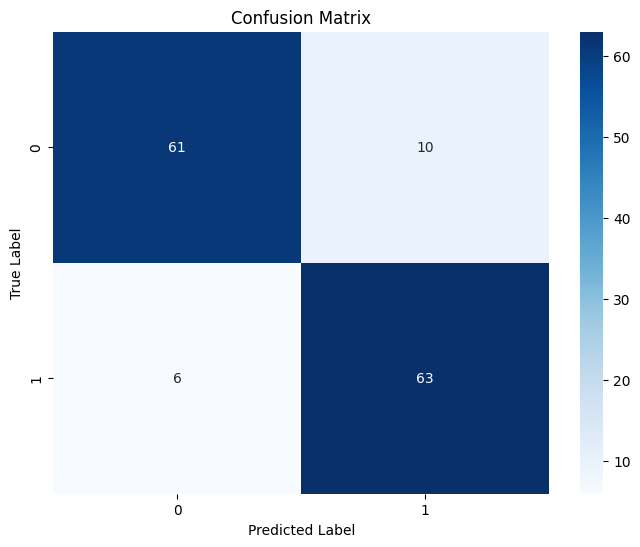

In [ ]:
# Train model
start = time.time()
svm1 = SVC(kernel='rbf', C=2, probability=True)
svm1.fit(X_train1, y_train1)
end_train = time.time()

# Predict on test set
svm1_pred = svm1.predict(X_test1)
end_predict = time.time()

# Generate confusion matrix, classification report, and accuracy score
cm = confusion_matrix(y_test1, svm1_pred)
cr = classification_report(y_test1, svm1_pred)
accuracy = accuracy_score(y_test1, svm1_pred)

print('Classification Report:\n', cr)
print('Accuracy Score:', accuracy)
print("time to train: " + "{:.2f}".format(end_train - start) + " s")
print("time to predict: " + "{:.2f}".format(end_predict - end_train) + " s")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

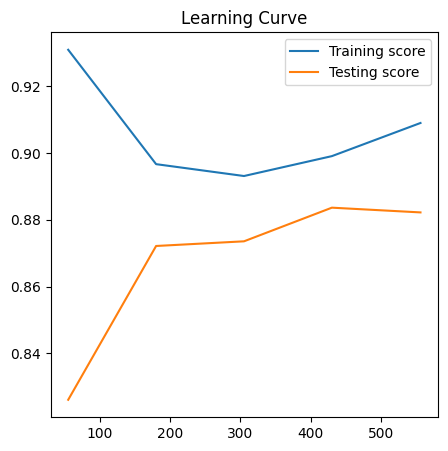

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(svm1, X1, y1, cv=5)

# plot the learning curve
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Testing score')
plt.legend(loc='best')
plt.title('Learning Curve')
plt.show()

###Cross-Validation & Bootstrapping (FS)

In [ ]:
cross_val_scores_svm1 = cross_val_score(svm1, X1, y1, cv=10)
print("Cross-validation scores:", cross_val_scores_svm1)
print("Average cross-validation score:", np.mean(cross_val_scores_svm1))

bootstrap_scores_svm1 = []
for i in range(100):
    X_sample, y_sample = resample(X_train1, y_train1, replace=True, n_samples=100, random_state=i)
    svm1.fit(X_sample, y_sample)
    y_pred_svm1 = svm1.predict(X_test1)
    score = accuracy_score(y_test1, y_pred_svm1)
    bootstrap_scores_svm1.append(score)

print("Bootstrap scores:", bootstrap_scores_svm1)
print("Average bootstrap score:", np.mean(bootstrap_scores_svm1))

Cross-validation scores: [0.88571429 0.84285714 0.81428571 0.88571429 0.9        0.94285714
 0.89855072 0.85507246 0.89855072 0.97101449]
Average cross-validation score: 0.8894616977225673
Bootstrap scores: [0.85, 0.8714285714285714, 0.8428571428571429, 0.8785714285714286, 0.85, 0.8571428571428571, 0.8428571428571429, 0.8857142857142857, 0.8642857142857143, 0.8571428571428571, 0.8428571428571429, 0.85, 0.8785714285714286, 0.8571428571428571, 0.8642857142857143, 0.8285714285714286, 0.8357142857142857, 0.8571428571428571, 0.8642857142857143, 0.85, 0.8357142857142857, 0.8571428571428571, 0.8642857142857143, 0.8428571428571429, 0.8428571428571429, 0.8714285714285714, 0.8642857142857143, 0.8357142857142857, 0.8357142857142857, 0.8571428571428571, 0.8357142857142857, 0.8571428571428571, 0.8214285714285714, 0.8357142857142857, 0.8571428571428571, 0.8142857142857143, 0.8642857142857143, 0.8285714285714286, 0.8571428571428571, 0.85, 0.8428571428571429, 0.8571428571428571, 0.8285714285714286, 0.

In [ ]:
# Cross-validation
cross_val_scores_svm1 = cross_val_score(svm1, X1, y1, cv=10)
print("Cross-validation scores:", cross_val_scores_svm1)
print("Average cross-validation score:", np.mean(cross_val_scores_svm1))

# Breakdown of classification report for each fold in cross-validation
cv_reports_svm1 = []
for fold_idx, score in enumerate(cross_val_scores_svm1):
    fold_report = f"Fold {fold_idx+1} Classification Report:\n"
    fold_report += classification_report(y1, cross_val_predict(svm1, X1, y1, cv=10))
    cv_reports_svm1.append(fold_report)

for fold_report in cv_reports_svm1:
    print(fold_report)

# Bootstrapping
bootstrap_scores_svm1 = []
bootstrap_reports_svm1 = []
for i in range(100):
    X_sample, y_sample = resample(X_train1, y_train1, replace=True, n_samples=100, random_state=i)
    svm1.fit(X_sample, y_sample)
    y_pred_svm1 = svm1.predict(X_test1)
    score = accuracy_score(y_test1, y_pred_svm1)
    bootstrap_scores_svm1.append(score)
    bootstrap_reports_svm1.append(f"Bootstrap {i+1} Classification Report:\n{classification_report(y_test1, y_pred_svm1)}")

print("Bootstrap scores:", bootstrap_scores_svm1)
print("Average bootstrap score:", np.mean(bootstrap_scores_svm1))

for bootstrap_report in bootstrap_reports_svm1:
    print(bootstrap_report)

# Cross-validation
cross_val_scores_svm1 = cross_val_score(svm1, X1, y1, cv=10)
print("Cross-validation scores:", cross_val_scores_svm1)
print("Average cross-validation score:", np.mean(cross_val_scores_svm1))

# Calculate average metrics across cross-validation folds
cv_reports_svm1 = cross_val_predict(svm1, X1, y1, cv=10, method='predict_proba')
cv_metrics_svm1 = classification_report(y1, np.argmax(cv_reports_svm1, axis=1), output_dict=True)
avg_cv_metrics_svm1 = {metric: np.mean([cv_metrics_svm1[str(cls)][metric] for cls in cv_metrics_svm1.keys() if cls.isdigit()]) for metric in cv_metrics_svm1['0'].keys()}

print("Average Metrics (Cross-validation):")
for metric, value in avg_cv_metrics_svm1.items():
    print(f"{metric}: {value}")


# Bootstrapping
bootstrap_scores_svm1 = []
bootstrap_reports_svm1 = []

for i in range(100):
    X_sample, y_sample = resample(X_train1, y_train1, replace=True, n_samples=len(y_test1), random_state=i)
    y_pred_svm1 = svm1.predict(X_test1)
    score = accuracy_score(y_test1, y_pred_svm1)
    bootstrap_scores_svm1.append(score)
    bootstrap_reports_svm1.append((X_sample, y_pred_svm1))

print("Bootstrap scores:", bootstrap_scores_svm1)
print("Average bootstrap score:", np.mean(bootstrap_scores_svm1))

# Calculate average accuracy score
avg_accuracy_svm1 = np.mean(bootstrap_scores_svm1)
print("Average Accuracy (Bootstrapping):", avg_accuracy_svm1)

# Calculate average metrics across bootstrapping iterations
class_metrics_sum = {}
num_classes = 0

for iteration in bootstrap_reports_svm1:
    _, y_pred = iteration
    report = classification_report(y_sample, y_pred, output_dict=True)
    if num_classes == 0:
        for cls in report.keys():
            if cls.isdigit():
                class_metrics_sum[cls] = {}
                num_classes += 1
    for cls in class_metrics_sum.keys():
        if cls in report:
            for metric, value in report[cls].items():
                if metric != 'support':
                    if metric not in class_metrics_sum[cls]:
                        class_metrics_sum[cls][metric] = value
                    else:
                        class_metrics_sum[cls][metric] += value

avg_bootstrap_metrics_svm1 = {}
for cls, metrics in class_metrics_sum.items():
    avg_metrics = {metric: value / num_classes for metric, value in metrics.items()}
    avg_bootstrap_metrics_svm1[cls] = avg_metrics

print("Average Metrics (Bootstrapping):")
for cls, metrics in avg_bootstrap_metrics_svm1.items():
    print(f"Class {cls}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")

Cross-validation scores: [0.88571429 0.84285714 0.81428571 0.88571429 0.9        0.94285714
 0.89855072 0.85507246 0.89855072 0.97101449]
Average cross-validation score: 0.8894616977225673
Fold 1 Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       348
           1       0.87      0.91      0.89       348

    accuracy                           0.89       696
   macro avg       0.89      0.89      0.89       696
weighted avg       0.89      0.89      0.89       696

Fold 2 Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       348
           1       0.87      0.91      0.89       348

    accuracy                           0.89       696
   macro avg       0.89      0.89      0.89       696
weighted avg       0.89      0.89      0.89       696

Fold 3 Classification Report:
              precision    recall  f1-score   support

           0

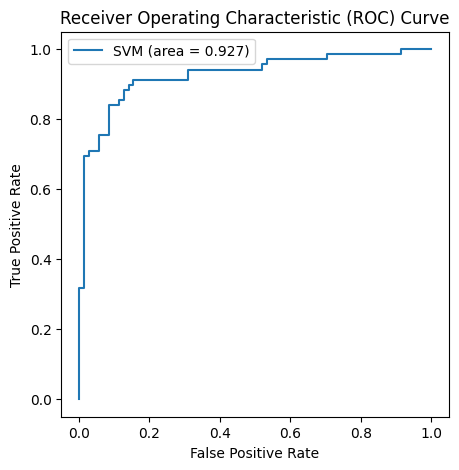

In [ ]:
y_pred_prob_svm = svm1.predict_proba(X_test1)[:,1]
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test1, y_pred_prob_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

plt.plot(fpr_svm, tpr_svm, label='SVM (area = %0.3f)' % roc_auc_svm)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='best')
plt.show()

###Hyperparameter Tuning (FS)

Best Parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Classification Report (Best Parameters):
               precision    recall  f1-score   support

           0       0.91      0.83      0.87        71
           1       0.84      0.91      0.87        69

    accuracy                           0.87       140
   macro avg       0.87      0.87      0.87       140
weighted avg       0.87      0.87      0.87       140

Accuracy Score (Best Parameters): 0.8714285714285714


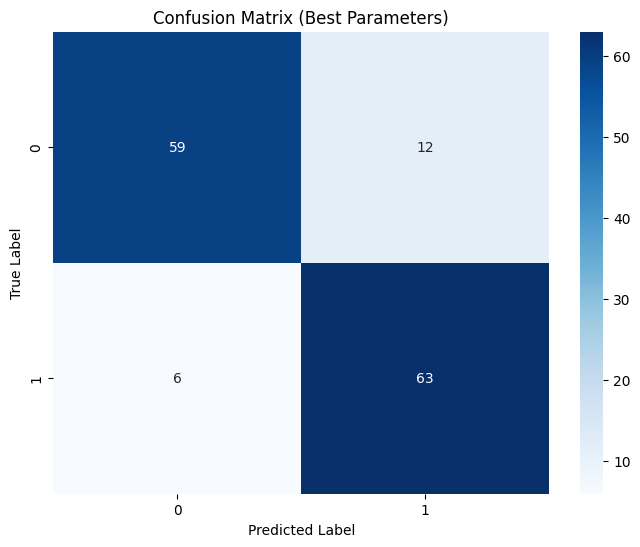

In [ ]:
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.1, 0.01, 0.001]
}


grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train1, y_train1)
best_params = grid_search.best_params_
svm_best = SVC(**best_params, probability=True)
svm_best.fit(X_train1, y_train1)

svm1_pred_best = svm_best.predict(X_test1)
cm_best = confusion_matrix(y_test1, svm1_pred_best)
cr_best = classification_report(y_test1, svm1_pred_best)
accuracy_best = accuracy_score(y_test1, svm1_pred_best)
print("Best Parameters:", best_params)

print('Classification Report (Best Parameters):\n', cr_best)
print('Accuracy Score (Best Parameters):', accuracy_best)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_best, annot=True, cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Best Parameters)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
# Print hasil prediksi SVM Hyperparameter Tuning
svm1_pred_best

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1])

In [ ]:
X_test1.head(6)

Air temperature _K_  Process temperature _K_  Rotational speed _rpm_  \
1608            -1.102207                -1.553582               -0.582011   
7867             0.247658                 1.344156               -0.222222   
9609            -0.502267                 0.063760               -0.174603   
9051            -1.302187                -0.947078                1.677249   
3140             0.197663                -0.071018                5.608466   
5615             1.497533                 1.478935               -1.301587   

      Torque _Nm_  Tool wear _min_  
1608    -0.155556        -1.240194  
7867    -0.148148        -1.083093  
9609     0.014815        -0.391851  
9051    -1.148148        -0.454691  
3140    -2.022222        -0.423271  
5615     2.311111         0.220842

# Comparison Tanpa Feature Selection

## Base Model

In [ ]:
print("Tanpa Feature Selection")

# model 1 (Random Forest)
precision_rf = precision_score(y_test, rf_pred, average=None)
recall_rf = recall_score(y_test, rf_pred, average=None)
f1_rf_score = f1_score(y_test, rf_pred, average=None)
accuracy_rf = accuracy_score(y_test, rf_pred)

# model 2 (XGBoost)
precision_xgb = precision_score(y_test1, xgb_pred, average=None)
recall_xgb = recall_score(y_test1, xgb_pred, average=None)
f1_xgb_score = f1_score(y_test1, xgb_pred, average=None)
accuracy_xgb = accuracy_score(y_test1, xgb_pred)

# model 3 (SVM)
precision_svm = precision_score(y_test, svm_pred, average=None)
recall_svm = recall_score(y_test, svm_pred, average=None)
f1_svm_score = f1_score(y_test, svm_pred, average=None)
accuracy_svm = accuracy_score(y_test, svm_pred)

# Create DataFrame for results
results1 = pd.DataFrame({
    'Model': ['Random Forest', 'XGBoost', 'Support Vector Machine'],
    'Precision (Class 0)': [precision_rf[0], precision_xgb[0], precision_svm[0]],
    'Precision (Class 1)': [precision_rf[1], precision_xgb[1], precision_svm[1]],
    'Recall (Class 0)': [recall_rf[0], recall_xgb[0], recall_svm[0]],
    'Recall (Class 1)': [recall_rf[1], recall_xgb[1], recall_svm[1]],
    'F1-Score (Class 0)': [f1_rf_score[0], f1_xgb_score[0], f1_svm_score[0]],
    'F1-Score (Class 1)': [f1_rf_score[1], f1_xgb_score[1], f1_svm_score[1]],
    'Accuracy': [accuracy_rf, accuracy_xgb, accuracy_svm]
})

# Sort the DataFrame by Accuracy in descending order
results1_sorted = results1.sort_values(by='Accuracy', ascending=False)

# Apply background gradient to the sorted DataFrame
styled_results1 = results1_sorted.style.background_gradient(cmap='Reds')

# Display the styled results table
display(styled_results1)

Tanpa Feature Selection


## Cross-Validation

In [ ]:
# Calculate average cross-validation scores
avg_cv_score_rf = np.mean(cross_val_scores_rf)
avg_cv_score_xgb = np.mean(cross_val_scores_xgb)
avg_cv_score_svm = np.mean(cross_val_scores_svm)

# Create DataFrame for results
results = pd.DataFrame({
    'Model': ['Random Forest', 'XGBoost', 'Support Vector Machine'],
    'Average cross-validation score': [avg_cv_score_rf, avg_cv_score_xgb, avg_cv_score_svm]
})

# Sort the DataFrame by Average cross-validation score in descending order
results_sorted = results.sort_values(by='Average cross-validation score', ascending=False)

# Apply background gradient to the sorted DataFrame
styled_results = results_sorted.style.background_gradient(cmap='Reds')

# Display the styled results table
display(styled_results)

## BootStraping

In [ ]:
# Calculate average cross-validation scores
avg_bootstrap_score_rf = np.mean(bootstrap_scores_rf)
avg_bootstrap_score_xgb = np.mean(bootstrap_scores_xgb)
avg_bootstrap_score_svm = np.mean(bootstrap_scores_svm)

# Create DataFrame for results
results = pd.DataFrame({
    'Model': ['Random Forest', 'XGBoost', 'Support Vector Machine'],
    'Average bootstrap score': [avg_bootstrap_score_rf, avg_bootstrap_score_xgb, avg_bootstrap_score_svm]
})

# Sort the DataFrame by Average cross-validation score in descending order
results_sorted = results.sort_values(by='Average bootstrap score', ascending=False)

# Apply background gradient to the sorted DataFrame
styled_results = results_sorted.style.background_gradient(cmap='Reds')

# Display the styled results table
display(styled_results)

## ROC AUC

Tanpa Feature Selection


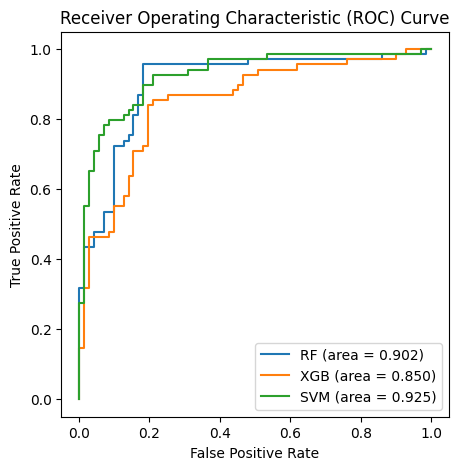

In [ ]:
print("Tanpa Feature Selection")

# Random Forest
y_pred_prob_rf = rf.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.plot(fpr_rf, tpr_rf, label='RF (area = %0.3f)' % roc_auc_rf)

# XGBoost
y_pred_prob_xgb = xgb.predict_proba(X_test1)[:,1]
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test1, y_pred_prob_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.plot(fpr_xgb, tpr_xgb, label='XGB (area = %0.3f)' % roc_auc_xgb)

# SVM
y_pred_prob_svm = svm.predict_proba(X_test)[:,1]
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_pred_prob_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

plt.plot(fpr_svm, tpr_svm, label='SVM (area = %0.3f)' % roc_auc_svm)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='best')
plt.show()

## Hyperparameter Tuning

In [ ]:
print("Tanpa Feature Selection")

# model 1 (Random Forest)
precision_rf_best = precision_score(y_test, rf_pred_best, average=None)
recall_rf_best = recall_score(y_test, rf_pred_best, average=None)
f1_rf_score_best = f1_score(y_test, rf_pred_best, average=None)
accuracy_rf_best = accuracy_score(y_test, rf_pred_best)

# model 2 (XGBoost)
precision_xgb_best = precision_score(y_test1, xgb_pred_best, average=None)
recall_xgb_best = recall_score(y_test1, xgb_pred_best, average=None)
f1_xgb_score_best = f1_score(y_test1, xgb_pred_best, average=None)
accuracy_xgb_best = accuracy_score(y_test1, xgb_pred_best)

# model 3 (SVM)
precision_svm_best = precision_score(y_test, svm_pred_best, average=None)
recall_svm_best = recall_score(y_test, svm_pred_best, average=None)
f1_svm_score_best = f1_score(y_test, svm_pred_best, average=None)
accuracy_svm_best = accuracy_score(y_test, svm_pred_best)

# Create DataFrame for results
results1 = pd.DataFrame({
    'Model': ['Random Forest', 'XGBoost', 'Support Vector Machine'],
    'Precision (Class 0)': [precision_rf_best[0], precision_xgb_best[0], precision_svm_best[0]],
    'Precision (Class 1)': [precision_rf_best[1], precision_xgb_best[1], precision_svm_best[1]],
    'Recall (Class 0)': [recall_rf_best[0], recall_xgb_best[0], recall_svm_best[0]],
    'Recall (Class 1)': [recall_rf_best[1], recall_xgb_best[1], recall_svm_best[1]],
    'F1-Score (Class 0)': [f1_rf_score_best[0], f1_xgb_score_best[0], f1_svm_score_best[0]],
    'F1-Score (Class 1)': [f1_rf_score_best[1], f1_xgb_score_best[1], f1_svm_score_best[1]],
    'Accuracy': [accuracy_rf_best, accuracy_xgb_best, accuracy_svm_best]
})

# Sort the DataFrame by Accuracy in descending order
results1_sorted = results1.sort_values(by='Accuracy', ascending=False)

# Apply background gradient to the sorted DataFrame
styled_results1 = results1_sorted.style.background_gradient(cmap='Reds')

# Display the styled results table
display(styled_results1)

Tanpa Feature Selection


# Comparison Dengan Feature Selection (FS)

## Base Model

In [ ]:
print("Dengan Feature Selection")

# model 1 (Random Forest)
precision_rf = precision_score(y_test1, rf1_pred, average=None)
recall_rf = recall_score(y_test1, rf1_pred, average=None)
f1_rf_score = f1_score(y_test1, rf1_pred, average=None)
accuracy_rf = accuracy_score(y_test1, rf1_pred)

# model 2 (XGBoost)
precision_xgb = precision_score(y_test1, xgb1_pred, average=None)
recall_xgb = recall_score(y_test1, xgb1_pred, average=None)
f1_xgb_score = f1_score(y_test1, xgb1_pred, average=None)
accuracy_xgb = accuracy_score(y_test1, xgb1_pred)

# model 3 (SVM)
precision_svm = precision_score(y_test1, svm1_pred, average=None)
recall_svm = recall_score(y_test1, svm1_pred, average=None)
f1_svm_score = f1_score(y_test1, svm1_pred, average=None)
accuracy_svm = accuracy_score(y_test1, svm1_pred)

# Create DataFrame for results
results2 = pd.DataFrame({
    'Model': ['Random Forest', 'XGBoost', 'Support Vector Machine'],
    'Precision (Class 0)': [precision_rf[0], precision_xgb[0], precision_svm[0]],
    'Precision (Class 1)': [precision_rf[1], precision_xgb[1], precision_svm[1]],
    'Recall (Class 0)': [recall_rf[0], recall_xgb[0], recall_svm[0]],
    'Recall (Class 1)': [recall_rf[1], recall_xgb[1], recall_svm[1]],
    'F1-Score (Class 0)': [f1_rf_score[0], f1_xgb_score[0], f1_svm_score[0]],
    'F1-Score (Class 1)': [f1_rf_score[1], f1_xgb_score[1], f1_svm_score[1]],
    'Accuracy': [accuracy_rf, accuracy_xgb, accuracy_svm]
})

# Sort the DataFrame by Accuracy in descending order
results2_sorted = results2.sort_values(by='Accuracy', ascending=False)

# Apply background gradient to the sorted DataFrame
styled_results2 = results2_sorted.style.background_gradient(cmap='Reds')

# Display the styled results table
display(styled_results2)

Dengan Feature Selection


## Cross-Validation

In [ ]:
# Calculate average cross-validation scores
avg_cv_score_rf = np.mean(cross_val_scores_rf1)
avg_cv_score_xgb = np.mean(cross_val_scores_xgb1)
avg_cv_score_svm = np.mean(cross_val_scores_svm1)

# Create DataFrame for results
results = pd.DataFrame({
    'Model': ['Random Forest', 'XGBoost', 'Support Vector Machine'],
    'Average cross-validation score': [avg_cv_score_rf, avg_cv_score_xgb, avg_cv_score_svm]
})

# Sort the DataFrame by Average cross-validation score in descending order
results_sorted = results.sort_values(by='Average cross-validation score', ascending=False)

# Apply background gradient to the sorted DataFrame
styled_results = results_sorted.style.background_gradient(cmap='Reds')

# Display the styled results table
display(styled_results)

## BootStraping

In [ ]:
# Calculate average cross-validation scores
avg_bootstrap_score_rf = np.mean(bootstrap_scores_rf1)
avg_bootstrap_score_xgb = np.mean(bootstrap_scores_xgb1)
avg_bootstrap_score_svm = np.mean(bootstrap_scores_svm1)

# Create DataFrame for results
results = pd.DataFrame({
    'Model': ['Random Forest', 'XGBoost', 'Support Vector Machine'],
    'Average bootstrap score': [avg_bootstrap_score_rf, avg_bootstrap_score_xgb, avg_bootstrap_score_svm]
})

# Sort the DataFrame by Average cross-validation score in descending order
results_sorted = results.sort_values(by='Average bootstrap score', ascending=False)

# Apply background gradient to the sorted DataFrame
styled_results = results_sorted.style.background_gradient(cmap='Reds')

# Display the styled results table
display(styled_results)

## ROC AUC

Dengan Feature Selection


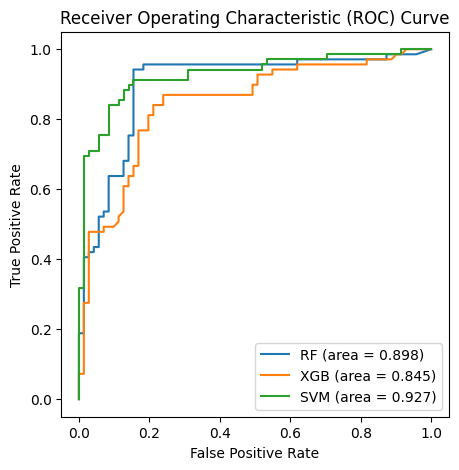

In [ ]:
print("Dengan Feature Selection")

# Random Forest
y_pred_prob_rf = rf1.predict_proba(X_test1)[:,1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test1, y_pred_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.plot(fpr_rf, tpr_rf, label='RF (area = %0.3f)' % roc_auc_rf)

# XGBoost
y_pred_prob_xgb = xgb1.predict_proba(X_test1)[:,1]
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test1, y_pred_prob_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.plot(fpr_xgb, tpr_xgb, label='XGB (area = %0.3f)' % roc_auc_xgb)

# SVM
y_pred_prob_svm = svm1.predict_proba(X_test1)[:,1]
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test1, y_pred_prob_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

plt.plot(fpr_svm, tpr_svm, label='SVM (area = %0.3f)' % roc_auc_svm)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='best')
plt.show()

## Hyperparameter Tuning

In [ ]:
print("Dengan Feature Selection")

# model 1 (Random Forest)
precision_rf_best = precision_score(y_test1, rf1_pred_best, average=None)
recall_rf_best = recall_score(y_test1, rf1_pred_best, average=None)
f1_rf_score_best = f1_score(y_test1, rf1_pred_best, average=None)
accuracy_rf_best = accuracy_score(y_test1, rf1_pred_best)

# model 2 (XGBoost)
precision_xgb_best = precision_score(y_test1, xgb1_pred_best, average=None)
recall_xgb_best = recall_score(y_test1, xgb1_pred_best, average=None)
f1_xgb_score_best = f1_score(y_test1, xgb1_pred_best, average=None)
accuracy_xgb_best = accuracy_score(y_test1, xgb1_pred_best)

# model 3 (SVM)
precision_svm_best = precision_score(y_test1, svm1_pred_best, average=None)
recall_svm_best = recall_score(y_test1, svm1_pred_best, average=None)
f1_svm_score_best = f1_score(y_test1, svm1_pred_best, average=None)
accuracy_svm_best = accuracy_score(y_test1, svm1_pred_best)

# Create DataFrame for results
results2 = pd.DataFrame({
    'Model': ['Random Forest', 'XGBoost', 'Support Vector Machine'],
    'Precision (Class 0)': [precision_rf_best[0], precision_xgb_best[0], precision_svm_best[0]],
    'Precision (Class 1)': [precision_rf_best[1], precision_xgb_best[1], precision_svm_best[1]],
    'Recall (Class 0)': [recall_rf_best[0], recall_xgb_best[0], recall_svm_best[0]],
    'Recall (Class 1)': [recall_rf_best[1], recall_xgb_best[1], recall_svm_best[1]],
    'F1-Score (Class 0)': [f1_rf_score_best[0], f1_xgb_score_best[0], f1_svm_score_best[0]],
    'F1-Score (Class 1)': [f1_rf_score_best[1], f1_xgb_score_best[1], f1_svm_score_best[1]],
    'Accuracy': [accuracy_rf_best, accuracy_xgb_best, accuracy_svm_best]
})

# Sort the DataFrame by Accuracy in descending order
results2_sorted = results2.sort_values(by='Accuracy', ascending=False)

# Apply background gradient to the sorted DataFrame
styled_results2 = results2_sorted.style.background_gradient(cmap='Reds')

# Display the styled results table
display(styled_results2)

Dengan Feature Selection


# Prediksi Model Terbaik

In [ ]:
# Hasil Prediksi data training
svm1_best_train = svm_best.predict(X_train1)
svm1_best_train

array([0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,

In [ ]:
# Mengetahui Indeks Data Training
X_train1

Air temperature _K_  Process temperature _K_  Rotational speed _rpm_  \
9785            -0.652252                -0.205797                1.026455   
1784            -0.852232                -1.351414                7.317460   
7718             0.297653                 1.141989               -0.402116   
9511            -0.452272                 0.198539               -0.285714   
3074             0.047678                -0.542743                1.481481   
...                   ...                      ...                     ...   
5488             1.347548                 1.478935               -0.280423   
4661             1.647519                 0.872432               -0.809524   
9493            -0.452272                -0.138407               -0.555556   
1764            -0.902227                -1.620971               -0.978836   
6960             0.347648                 0.670264               -0.476190   

      Torque _Nm_  Tool wear _min_  
9785    -0.762963        -0.533241  
1784    -2.688889        -0.800312  
7718     0.333333        -0.329010  
9511     0.044444        -1.067383  
3074    -0.948148         0.158002  
...           ...              ...  
5488     0.888889         1.650458  
4661     0.592593        -1.193064  
9493     1.133333         1.713298  
1764     1.155556        -1.695786  
6960     0.881481        -0.266170  

[556 rows x 5 columns]

In [ ]:
# Menampilkan data dengan TWF = 1
df_TWF = df[(df['TWF'] == 1)]
df_TWF # misal ambil indeks ke 77 & 1087

Type  Air temperature [K]  Process temperature [K]  \
77      L                298.8                    308.9   
1087    H                296.9                    307.8   
1509    L                298.0                    308.5   
1682    H                297.9                    307.4   
1763    L                298.2                    307.6   
1996    M                298.4                    308.0   
2166    M                299.6                    309.2   
2244    M                299.3                    308.4   
2671    M                299.7                    309.3   
2864    H                300.6                    309.4   
2941    M                300.7                    309.6   
3529    L                301.9                    310.9   
3611    L                301.7                    310.9   
3695    L                302.2                    311.3   
3865    H                302.6                    311.5   
4034    L                302.0                    310.8   
4207    M                302.3                    310.9   
4385    L                301.8                    309.7   
4469    L                302.7                    310.5   
4646    L                303.3                    311.4   
4816    L                303.4                    312.0   
5141    L                304.4                    313.7   
5309    M                303.9                    313.2   
5401    M                302.6                    312.3   
5909    H                300.7                    310.2   
5999    M                300.4                    310.2   
6172    L                300.8                    310.6   
6256    L                301.0                    310.6   
6340    H                300.5                    309.9   
6419    H                300.3                    309.9   
6759    L                301.7                    311.0   
7087    L                300.6                    310.3   
7426    M                300.0                    311.4   
7510    L                300.5                    311.8   
7687    M                300.7                    311.7   
7849    M                300.3                    311.7   
8111    M                300.4                    311.8   
8199    L                299.2                    310.7   
8357    L                298.5                    309.5   
8609    L                297.4                    308.3   
8690    L                297.1                    308.5   
8846    M                297.4                    308.8   
9018    L                297.3                    308.1   
9174    L                297.8                    308.9   
9576    L                299.6                    310.7   
9758    L                298.6                    309.8   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
77                      1455         41.3              208                1   
1087                    1549         35.8              206                1   
1509                    1429         37.7              220                1   
1682                    1604         36.1              225                1   
1763                    1511         31.0              209                1   
1996                    1416         38.2              198                1   
2166                    1867         23.4              225                1   
2244                    1542         37.5              203                1   
2671                    1399         41.9              221                1   
2864                    1380         47.6              246                1   
2941                    1996         19.8              203                1   
3529                    1567         39.0              214                1   
3611                    1405         46.4              207                1   
3695                    1530         37.3              207                1   
3865                    1629         34.4     

In [ ]:
# Cek apakah indeks 77 & 1087 merupakan data training --> hasil pred no.238
X_train1.loc[77] # tidak error berarti benar indeks 77 merupakan data training

Air temperature _K_       -0.602257
Process temperature _K_   -0.744911
Rotational speed _rpm_    -0.253968
Torque _Nm_                0.088889
Tool wear _min_            1.571907
Name: 77, dtype: float64

In [ ]:
# Menampilkan data dengan RNF = 1
df_RNF = df[(df['RNF'] == 1)]
df_RNF # misal ambil indeks 1221 --> hasil pred no.475

Type  Air temperature [K]  Process temperature [K]  \
1221    M                297.0                    308.3   
1302    L                298.6                    309.8   
1748    H                298.4                    307.7   
2072    L                299.6                    309.5   
2559    L                299.3                    309.0   
3065    M                300.1                    309.2   
3452    H                301.6                    310.5   
3611    L                301.7                    310.9   
5471    L                302.7                    312.3   
5489    L                302.6                    312.1   
5495    H                302.9                    312.5   
5509    L                302.8                    312.2   
5553    L                302.5                    311.9   
5639    L                302.6                    312.1   
6091    L                300.9                    310.7   
6913    L                300.8                    311.2   
6960    L                300.7                    311.0   
7488    L                300.3                    311.7   
7868    H                300.4                    311.9   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
1221                    1399         46.4              132                1   
1302                    1505         45.7              144                1   
1748                    1626         31.1              166                1   
2072                    1570         35.5              189                1   
2559                    1447         50.4              140                1   
3065                    1687         27.7               95                1   
3452                    1602         32.3                2                1   
3611                    1405         46.4              207                1   
5471                    1346         61.2              170                1   
5489                    1499         35.0              215                1   
5495                    1357         55.0               12                1   
5509                    1509         36.5               52                1   
5553                    1306         59.7              172                1   
5639                    1668         28.7              180                1   
6091                    1412         57.5               16                1   
6913                    1481         38.5              181                1   
6960                    1413         52.0               91                1   
7488                    1545         43.5              160                1   
7868                    1438         46.7               41                1   

      TWF  HDF  PWF  OSF  RNF  Condition  
1221    0    0    0    0    1          1  
1302    0    0    0    0    1          1  
1748    0    0    0    0    1          1  
2072    0    0    0    0    1          1  
2559    0    0    0    0    1          1  
3065    0    0    0    0    1          1  
3452    0    0    0    0    1          1  
3611    1    0    0    0    1          1  
5471    0    0    0    0    1          1  
5489    0    0    0    0    1          1  
5495    0    0    0    0    1          1  
5509    0    0    0    0    1          1  
5553    0    0    0    0    1          1  
5639    0    0    0    0    1          1  
6091    0    0    0    0    1          1  
6913    0    0    0    0    1          1  
6960    0    0    0    0    1          1  
7488    0    0    0    0    1          1  
7868    0    0    0    0    1          1

In [ ]:
# Cek apakah indeks 1221 merupakan data training
X_train1.loc[1221] # tidak error berarti benar indeks 1221 merupakan data training

Air temperature _K_       -1.502167
Process temperature _K_   -1.149246
Rotational speed _rpm_    -0.550265
Torque _Nm_                0.466667
Tool wear _min_            0.377943
Name: 1221, dtype: float64

In [ ]:
X_train1.to_excel("datatrain.xlsx")

In [ ]:
# Memilih data
df_awal_test = df.iloc[[4182,1123,5396,851,4609],] # indeks ke 851 & 4609 adalah produk yang tidak rusak
df_awal_train = df.iloc[[77,1221]]
# Memilih data hasil prediksi sesua indeks df_awal
df_pred_test = svm1_pred_best[[35,11,10,0,1]] # indeks ke 0 & 1 adalah produk yang tidak rusak
df_pred_train = svm1_best_train[[238,475]]
# Menggabungkan data awal dan data prediksi
df_awal_test['Machine Failure Prediction'] = df_pred_test
df_awal_train['Machine Failure Prediction'] = df_pred_train
# Hasil data prediksi final
df_hasil_test = df_awal_test.drop(columns=['Condition'])
df_hasil_train = df_awal_train.drop(columns=['Condition'])
# Mengubuah urutan kolom
# Hasil prediksi final
#df_final = df_hasil.iloc[:,[0,1,2,3,4,5,7,8,9,10,11,6,12]]
#df_final

<ipython-input-125-35f6298de3ed>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_awal_test['Machine Failure Prediction'] = df_pred_test
<ipython-input-125-35f6298de3ed>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_awal_train['Machine Failure Prediction'] = df_pred_train


In [ ]:
df_hasil_test

Type  Air temperature [K]  Process temperature [K]  \
4185    L                302.2                    310.6   
1123    H                296.6                    307.7   
5400    L                302.7                    312.4   
851     M                296.2                    307.2   
4612    L                303.0                    311.3   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
4185                    1348         48.4              161                1   
1123                    1386         62.3              100                1   
5400                    1477         46.3              251                1   
851                     1389         48.6                7                0   
4612                    2194         16.5              148                0   

      TWF  HDF  PWF  OSF  RNF  Machine Failure Prediction  
4185    0    1    0    0    0                           1  
1123    0    0    1    0    0                           1  
5400    0    0    0    1    0                           1  
851     0    0    0    0    0                           0  
4612    0    0    0    0    0                           0

In [ ]:
df_hasil_train

Type  Air temperature [K]  Process temperature [K]  \
77      L                298.8                    308.9   
1221    M                297.0                    308.3   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
77                      1455         41.3              208                1   
1221                    1399         46.4              132                1   

      TWF  HDF  PWF  OSF  RNF  Machine Failure Prediction  
77      1    0    0    0    0                           1  
1221    0    0    0    0    1                           0

In [ ]:
# Hasil Prediksi Kerusakan Produk
df_fp = pd.concat([df_hasil_test, df_hasil_train], axis=0)
df_final_prediksi = df_fp.iloc[:,[0,1,2,3,4,5,7,8,9,10,11,6,12]]
df_final_prediksi

Type  Air temperature [K]  Process temperature [K]  \
4185    L                302.2                    310.6   
1123    H                296.6                    307.7   
5400    L                302.7                    312.4   
851     M                296.2                    307.2   
4612    L                303.0                    311.3   
77      L                298.8                    308.9   
1221    M                297.0                    308.3   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  TWF  HDF  PWF  \
4185                    1348         48.4              161    0    1    0   
1123                    1386         62.3              100    0    0    1   
5400                    1477         46.3              251    0    0    0   
851                     1389         48.6                7    0    0    0   
4612                    2194         16.5              148    0    0    0   
77                      1455         41.3              208    1    0    0   
1221                    1399         46.4              132    0    0    0   

      OSF  RNF  Machine failure  Machine Failure Prediction  
4185    0    0                1                           1  
1123    0    0                1                           1  
5400    1    0                1                           1  
851     0    0                0                           0  
4612    0    0                0                           0  
77      0    0                1                           1  
1221    0    1                1                           0